In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.filterwarnings('ignore')

Lets read the data from loan.csv for the analysis

In [2]:
loan = pd.read_csv("./loan.csv")

# Data Cleaning
       Data cleaning is an essential step in preparing data for analysis or modeling. It involves identifying and correcting errors, handling missing values, and transforming raw data into a usable format. Python provides powerful libraries and tools for data cleaning. Below is an overview of some common tasks and techniques for cleaning data using Python.
Main tasks need to performed on the data :

    1. Handling Missing Values

    2. Removing Duplicates

    3. Handling Outliers

    4. Transforming data in required format

        a. Standardizing / Normalizing Data

        b. Encoding Categorical Data

        c. Parsing dates
        
    5. Cleaning Text Data (Using regex and other techniques)

### a. Let's perform operations on Rows to clean up unnecessary rows.

In [3]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

In [6]:
#Lets keep the total rows handy
total_no_rows = len(loan["loan_status"])
total_no_rows

39717

In [7]:
#Lets list Fully Paid, Charged Off and Current status count for all the customers
loan["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [8]:
# Since we need to calculate on the basis of the loan status and "Current" status would not add any value to the analysis we can drop the rown containing loan status as current.
loan = loan[loan["loan_status"] != "Current"]
print("Total percentage of Rows Present  : ", ((len(loan)/total_no_rows) * 100))

Total percentage of Rows Present  :  97.12969257496789


In [9]:
#Reassinging the number of rows to the new count
total_no_rows = len(loan)
total_no_rows

38577

### b. Let's not perform operations on Columns and clean the unnecessary ones

In [10]:
loan.shape

(38577, 111)

In [11]:
#Check the details of Columns with Null Values.
(loan.isnull().sum()*100)/len(loan)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### Observation : 
        As we can see above there are too many columns with null values and we can clean them up first. We need to clean them up since they don't add any value to the analysis.

In [12]:
#Lets print the number of Columns with Null Values

print("Number of Columns with Null Values : ", len(loan.columns[loan.isnull().all()].to_list()))
columns_with_na = list(loan.columns[loan.isnull().all()])
print("Columns to be removed are of length  : ")
columns_with_na

Number of Columns with Null Values :  55
Columns to be removed are of length  : 


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [13]:
#Lets first drop columns with missing values more than 50
missing_data = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_data.loc[missing_data > 0]

emp_title                       6.19
emp_length                      2.68
desc                           32.48
title                           0.03
mths_since_last_delinq         64.56
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [14]:
columns_with_missing_values = list(missing_data[missing_data >= 50].index)
len(columns_with_missing_values)

57

In [15]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(38577, 54)

In [16]:
#Lets delete all the Columns with the rows having a value null or na.

loan = loan.dropna(axis=1, how="all")
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [17]:
#Lets delete all the columns which are not needed for analysis with unique values in it. 
unique_col = [col for col in loan.columns if loan[col].nunique() == len(loan)]
unique_col


['id', 'member_id', 'url']

The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or nan(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis. Even desc doesnt add any value to the analysis. We can decide to drop these columns for analysis.

In [18]:
#Lets drop the columns chargeoff_within_12_mths , tax_liens, collections_12_mths_ex_med
drop_columnlist = ['desc','chargeoff_within_12_mths', 'tax_liens','collections_12_mths_ex_med']
loan_df = loan.drop(drop_columnlist,axis=1)

In [19]:
loan_df.shape

(38577, 50)

In [20]:
#Lets have a look at bankrupcies data

loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [21]:
#Lets remove or cleanup the data in pub_rec_bankruptcies

loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]
loan_df.shape

(37880, 50)

In [22]:
# Calculate the missing data again

missing_data = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing_data[missing_data != 0]

emp_title       6.19
emp_length      2.73
title           0.03
revol_util      0.13
last_pymnt_d    0.19
dtype: float64

#### Observation : 
        Next, the columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these varaibles.

In [23]:
loan_df=loan_df[~loan_df.emp_title.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]

In [24]:
loan_df.shape

(35482, 50)

In [25]:
missing_data = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing_data[missing_data != 0]

title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [26]:
loan_df=loan_df[~loan_df.title.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]

In [27]:
loan_df.shape

(35367, 50)

In [28]:
missing_data =round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing_data[missing_data != 0]

Series([], dtype: float64)

#### Clean Data Set
            Now that we have cleaned up all possible dataset lets save it in a CSV by name cleaned_up_loan_data.csv

In [29]:
loan_df.to_csv('cleaned_up_loan_data.csv', encoding='utf-8', index=False)

In [30]:
clean_loan_data = loan_df[:]

In [31]:
clean_loan_data.nunique().sort_values()

pymnt_plan                     1
delinq_amnt                    1
policy_code                    1
acc_now_delinq                 1
application_type               1
out_prncp_inv                  1
out_prncp                      1
initial_list_status            1
loan_status                    2
term                           2
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             509
zip_code                     805
loan_amnt                    847
funded_amn

#### Data Dictionary file (cleanup unnecessary data): 
A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file. Let's use this file to get a better understanding of the 50 columns we are left with. This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:


policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.

application_type : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.

acc_now_delinq : value for entire dataset is '0', therefore can be removed.

id : Since it cannot be used for any other purpose in the analysis we will be dropping it.

member_id : Member ID eventhough its unique and its per user it wont contribute much in the analysis

pymnt_plan : All the values for entire dataset is 'n', therefore can be removed.

url : This is URL is not useful as we cannot check the details by calling the URL as well.

zip_code : Zip code is not a complete one so its not valid in the analysis now.

initial_list_status : The data present in the Columns are f and its not useful for the analysis so removing it.

delinq_amnt : Since the values are 0 we are not considering it for analysis.

In [32]:
columns_tobe_dropped = ['policy_code','application_type','acc_now_delinq','id','member_id','pymnt_plan','url','zip_code','initial_list_status','delinq_amnt',]
clean_loan_data= clean_loan_data.drop(columns_tobe_dropped,axis=1)

In [33]:
clean_loan_data.shape

(35367, 40)

#### Standardise values

Next, let's standardize the precision of the data. There are certain columns with need rounding of the values up until two decimal places.

These columns are:

total_pymnt
total_rec_late_fee
collection_recovery_fee

In [34]:
clean_loan_data.total_pymnt.value_counts().tail()

total_pymnt
14370.922250    1
5134.085288     1
4015.960000     1
11652.750000    1
1476.190000     1
Name: count, dtype: int64

In [35]:
clean_loan_data.total_rec_late_fee.value_counts().tail()

total_rec_late_fee
78.906117    1
44.998242    1
74.997288    1
14.997612    1
59.990031    1
Name: count, dtype: int64

In [36]:
clean_loan_data.collection_recovery_fee.value_counts().tail()

collection_recovery_fee
2.2906      1
670.8193    1
625.6170    1
152.5140    1
36.3708     1
Name: count, dtype: int64

In [37]:
clean_loan_data.total_pymnt= round(clean_loan_data.total_pymnt,2)
clean_loan_data.total_rec_late_fee= round(clean_loan_data.total_rec_late_fee,2)
clean_loan_data.collection_recovery_fee= round(clean_loan_data.collection_recovery_fee,2)

#### Fix invalid values

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.

These columns are:

issue_d
earliest_cr_line
last_pymnt_d
last_credit_pull_d

In [38]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_loan_data[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35367 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             35367 non-null  object
 1   earliest_cr_line    35367 non-null  object
 2   last_pymnt_d        35367 non-null  object
 3   last_credit_pull_d  35367 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [39]:
clean_loan_data.issue_d = pd.to_datetime(clean_loan_data.issue_d, format='%b-%y')
clean_loan_data.earliest_cr_line = pd.to_datetime(clean_loan_data.earliest_cr_line, format='%b-%y')
clean_loan_data.last_pymnt_d = pd.to_datetime(clean_loan_data.last_pymnt_d, format='%b-%y')
clean_loan_data.last_credit_pull_d = pd.to_datetime(clean_loan_data.last_credit_pull_d, format='%b-%y')

In [40]:
clean_loan_data[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35367 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             35367 non-null  datetime64[ns]
 1   earliest_cr_line    35367 non-null  datetime64[ns]
 2   last_pymnt_d        35367 non-null  datetime64[ns]
 3   last_credit_pull_d  35367 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.3 MB


In [41]:
#Dropping Duplicated rows if any
clean_loan_data=clean_loan_data.drop_duplicates()
clean_loan_data.shape

(35367, 40)

#### Filter the data
Next, there are few columns expressing % like int_rate and revol_util. These has values like '15.27%' and '9.40%'. Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [42]:
clean_loan_data.int_rate.describe()

count      35367
unique       334
top       10.99%
freq         862
Name: int_rate, dtype: object

In [43]:
clean_loan_data.revol_util.describe()

count     35367
unique     1081
top          0%
freq        832
Name: revol_util, dtype: object

In [44]:
clean_loan_data['int_rate'] = clean_loan_data['int_rate'].str.strip('%').astype('float')
clean_loan_data['revol_util'] = clean_loan_data['revol_util'].str.strip('%').astype('float')

In [45]:
clean_loan_data[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35367 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    35367 non-null  float64
 1   revol_util  35367 non-null  float64
dtypes: float64(2)
memory usage: 828.9 KB


#### Employee Length Column
        Lets analyse emp_length column which is needed for the analysis. 

        According to the data_dictionary file description for this field, emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [46]:
clean_loan_data.emp_length.value_counts()

emp_length
10+ years    8028
2 years      4083
< 1 year     3978
3 years      3833
4 years      3206
5 years      3043
1 year       2959
6 years      2062
7 years      1638
8 years      1361
9 years      1176
Name: count, dtype: int64

In [47]:
#Let's convert the column to have values between 0 and 10.
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [48]:
#Lets replace the values since we need int for analysis

clean_loan_data = clean_loan_data.replace({"emp_length": emp_length_dict })

In [49]:
clean_loan_data['emp_length'].value_counts()

emp_length
10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: count, dtype: int64

In [50]:
clean_loan_data.term.value_counts()

term
36 months    26377
60 months     8990
Name: count, dtype: int64

In [51]:
clean_loan_data['term'] = clean_loan_data.term.apply(lambda x: x.split()[0])
clean_loan_data.term.value_counts()

term
36    26377
60     8990
Name: count, dtype: int64

In [52]:
clean_loan_data['issue_d_month'] = clean_loan_data['issue_d'].dt.month
clean_loan_data['issue_d_year'] = clean_loan_data['issue_d'].dt.year

#### Final Data Set for the analysis

In [53]:
clean_loan_data.to_csv('final_loan_data.csv', encoding='utf-8', index=False)

In [54]:
final_loan_data = clean_loan_data[:]
final_loan_data.shape

(35367, 42)

In [55]:
final_loan_data.loan_status.value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Name: count, dtype: int64

# Univariate and Segmented Univariate Analysis

In [56]:
(final_loan_data['grade'].value_counts(normalize=True)*100).sort_index()

grade
A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: proportion, dtype: float64

In [57]:
final_loan_data['loan_amnt'].describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_amnt'>

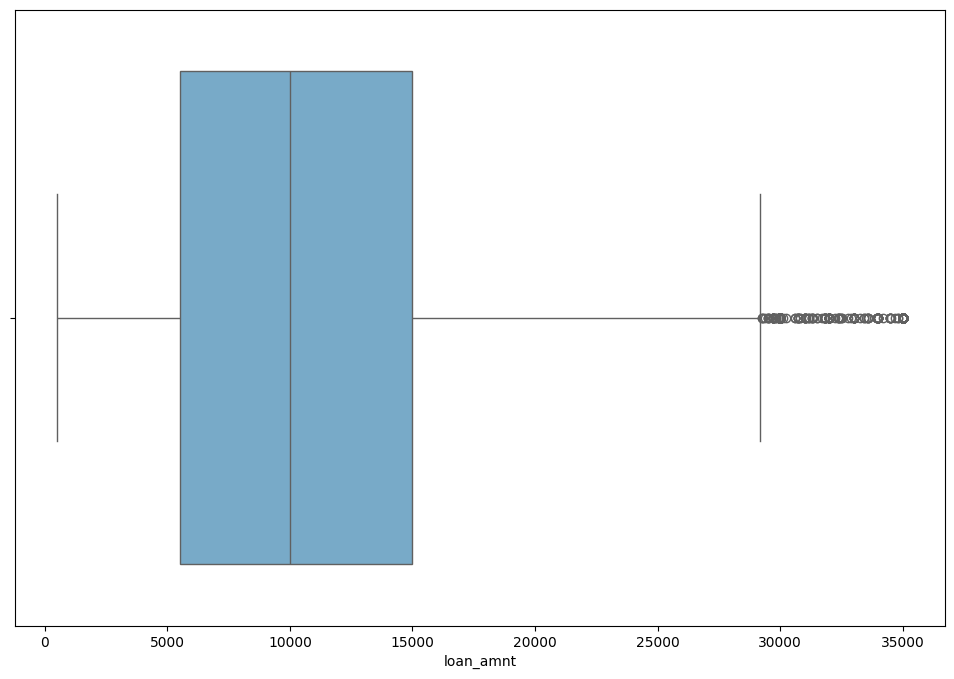

In [58]:
sns.boxplot(x = final_loan_data['loan_amnt'], palette = 'Blues')

In [59]:
final_loan_data['annual_inc'].describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

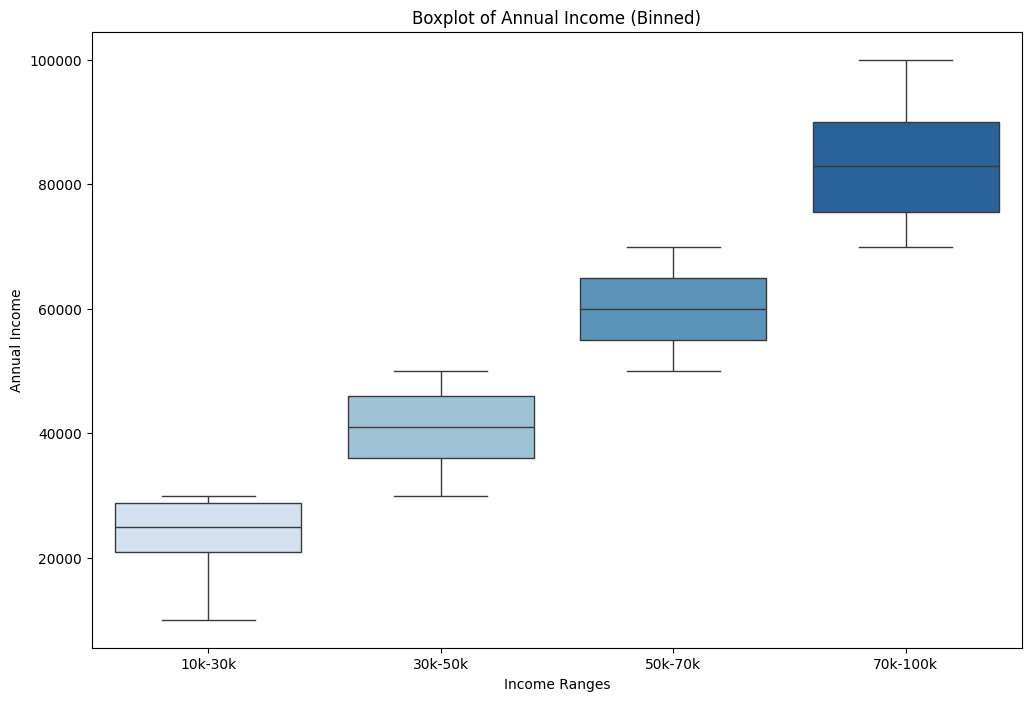

In [60]:
# Create bins for the annual_inc variable
final_loan_data['income_bin'] = pd.cut(
    final_loan_data['annual_inc'], 
    bins=[10000, 30000, 50000, 70000, 100000],
    labels=['10k-30k', '30k-50k', '50k-70k', '70k-100k']
)

# Plot the boxplot
sns.boxplot(
    x=final_loan_data['income_bin'], 
    y=final_loan_data['annual_inc'], 
    palette='Blues'
)

# Customize plot
plt.title('Boxplot of Annual Income (Binned)')
plt.xlabel('Income Ranges')
plt.ylabel('Annual Income')
plt.show()

In [61]:
final_loan_data['int_rate'].describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Axes: xlabel='int_rate'>

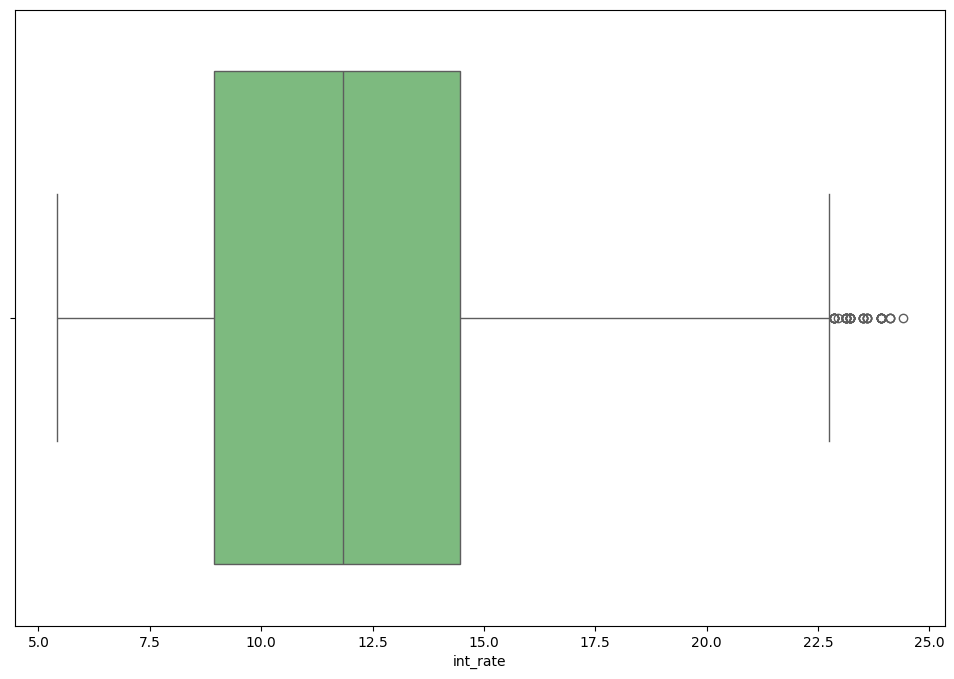

In [62]:
sns.boxplot(x = final_loan_data['int_rate'], palette = 'Greens')

In [63]:
final_loan_data['installment'].describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Axes: xlabel='installment'>

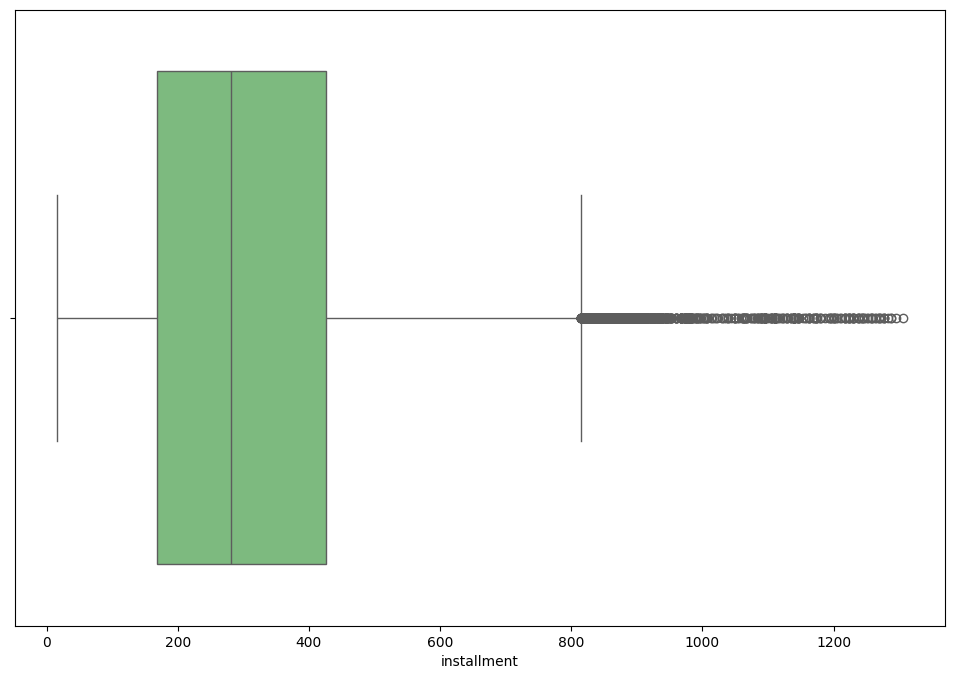

In [64]:
sns.boxplot(x = final_loan_data['installment'], palette = 'Greens')

In [65]:
final_loan_data['loan_amnt'].describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_amnt'>

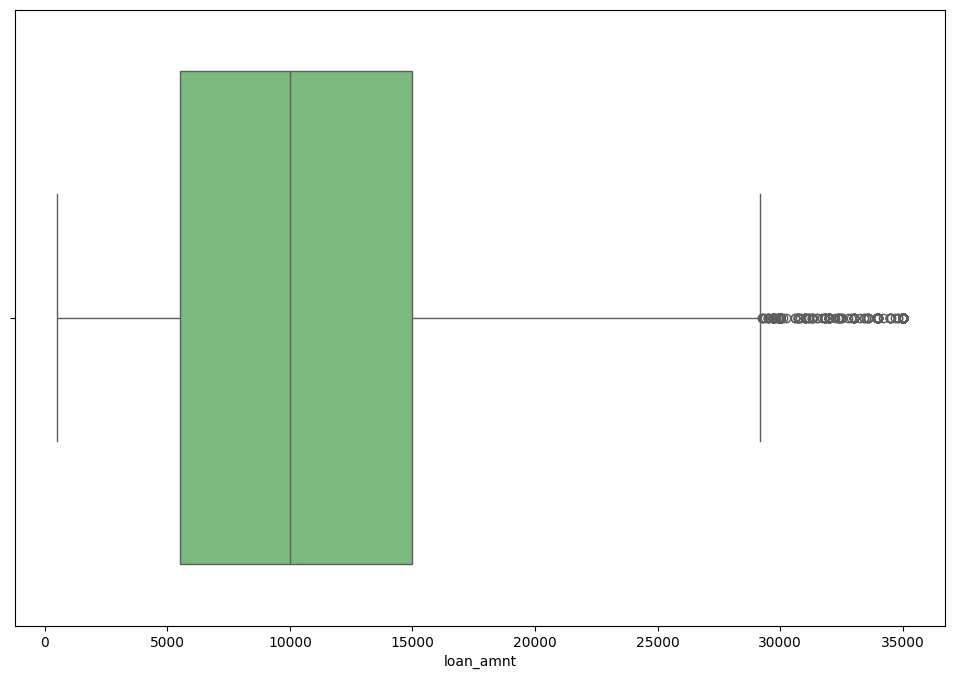

In [66]:
sns.boxplot(x = final_loan_data['loan_amnt'], palette = 'Greens')

# Segmented Univariate Analysis

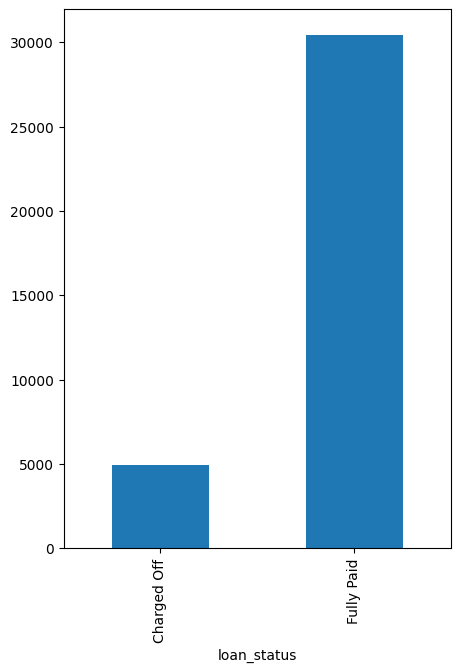

In [67]:
plt.figure(figsize=(5,7))
ax = final_loan_data.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

In [68]:
print("%.2f" % (final_loan_data.loc[final_loan_data['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(final_loan_data)))

13.98


#### Observation : 
            Approximately 14% of loans in the dataset are defaulted. Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.98 - a large enough increase)

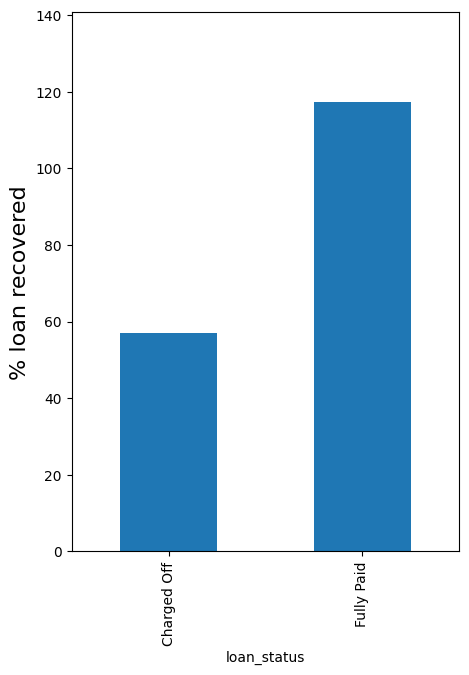

In [69]:
plt.figure(figsize=(5,7))
ax = (final_loan_data.groupby('loan_status').total_pymnt.sum() * 100 / final_loan_data.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

#### Observation : 
        Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit.


loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

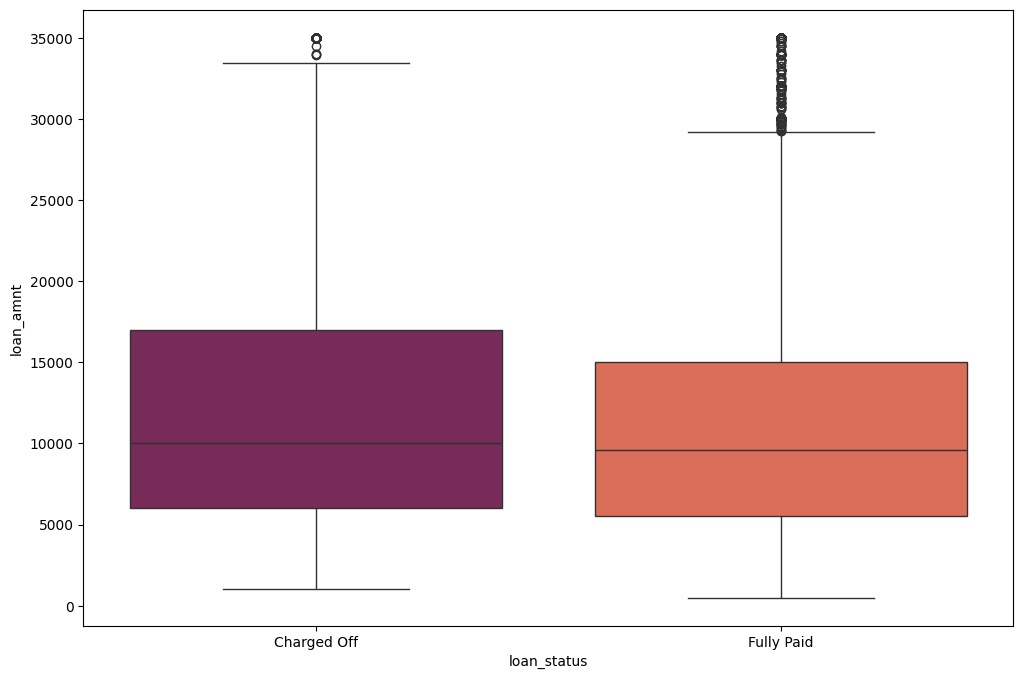

In [70]:
sns.boxplot(data = final_loan_data, x = final_loan_data["loan_status"], y = final_loan_data["loan_amnt"], palette = "rocket")
plt.show()

In [71]:
final_loan_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


#### Observation:

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.
Charged off loans are shifted towards higher average loan amount request.

In [72]:
#Create Derived categorical variable
final_loan_data['loan_amnt_bin'] = pd.cut(final_loan_data['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

##### Let's add few functions for ease of use

In [73]:
def add_bar_labels(ax, counts=None):
    """
    Annotate the bars in the provided axes with percentage values and optional additional counts.
    
    Parameters:
    - ax: The axes object containing the bars to annotate.
    - counts: A dictionary containing additional counts for each bar (optional).
    
    Returns:
    - None (modifies the plot directly).
    """
    plt.margins(0.2, 0.2)
    rects = ax.patches  # Get the list of bars (patches) in the plot
    
    # If counts are provided, map the counts to the corresponding bar labels
    if counts is not None:
        counts = {str(k): v for k, v in counts.items()}
    
    # Loop through each bar and annotate
    for i, rect in enumerate(rects):
        y_value = rect.get_height()  # Height of the bar (used for annotation)
        x_value = rect.get_x() + rect.get_width() / 2  # X position (center of the bar)
        
        # Define spacing and vertical alignment
        space = 5
        va = 'bottom' if y_value >= 0 else 'top'  # Align text at the top or bottom
        
        # Adjust label positioning for negative values
        if y_value < 0:
            space *= -1  # Move label below the bar
        
        # Create label with formatted percentage and counts if available
        if counts is None:
            label = "{:.1f}%".format(y_value)
        else:
            label = "{:.1f}%".format(y_value)
            bar_label = str(ax.get_xticklabels()[i].get_text())
            count_label = counts.get(bar_label, "")
            if count_label:
                label += "\n(of {})".format(count_label)
        
        # Annotate the bar with the label
        ax.annotate(
            label,                      # Text to display
            (x_value, y_value),         # Position of the label
            xytext=(0, space),          # Vertical offset for the label
            textcoords="offset points", # Use points for offset
            ha='center',                # Horizontally center the label
            va=va                       # Vertical alignment (top or bottom)
        )

In [74]:
def add_bar_labels_single(ax):
    """
    Adds percentage labels to each bar in the bar plot.

    Args:
    - ax: Matplotlib Axes object representing the bar plot.
    """
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10)

In [75]:
def plot_loan_status_by_percent(dataframe, group_by, loan_status='Charged Off'):
    """
    Plots the percentage distribution of a specific loan status grouped by a specified column.

    Args:
    - dataframe (pd.DataFrame): Input DataFrame containing loan data.
    - group_by (str): Column to group the data by (e.g., 'Grade', 'Employment Status').
    - loan_status (str): The loan status to filter for the plot (default is 'Charged Off').

    Returns:
    - ax: Matplotlib Axes object of the bar plot.
    """
    # Group by loan status and the specified column, then count occurrences
    grouped_counts = dataframe.groupby(['loan_status', group_by])[group_by].count()
    
    # Total counts for each category in the specified column
    total_counts = dataframe.groupby(group_by)[group_by].count()
    
    # Calculate percentages
    percentages = (grouped_counts.unstack() * 100 / total_counts).T
    
    # Plot the percentage distribution for the specified loan status
    ax = percentages[loan_status].plot(kind='bar', color=sns.color_palette('husl', len(percentages.index)))
    ax.set_title(f'Percentage of Loans with Status "{loan_status}" by {group_by}')
    ax.set_xlabel(group_by)
    ax.set_ylabel(f'Percentage of Loans ({loan_status})')
    
    # Add raw counts as labels on the bars
    loan_status_counts = grouped_counts[loan_status] if loan_status in grouped_counts.index else {}
    add_bar_labels(ax, loan_status_counts.to_dict())
    
    # Improve layout
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by loan_amnt_bin'}, xlabel='loan_amnt_bin', ylabel='Percentage of Loans (Charged Off)'>

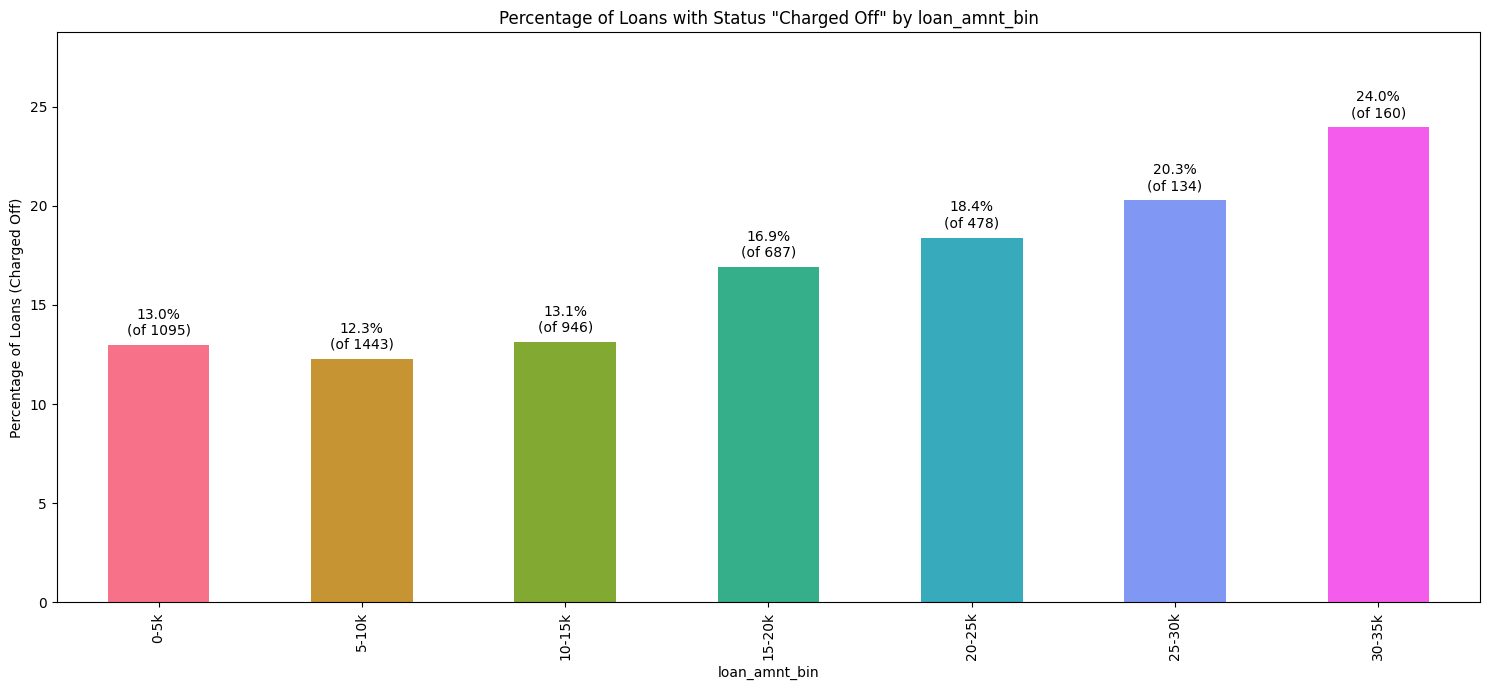

In [76]:
# Lets plot loan status by the percentage value
plt.figure(figsize=(15,7))
plot_loan_status_by_percent(final_loan_data,'loan_amnt_bin')


#### Observation :

The percentage of charged off loans increases substantially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

Other categorical variables distribution

Let's see how some other categorical variables of interest are distributed within the dataset

In [77]:
def categorical_bar_plots(dataframe, columns):
    """
    Creates bar plots for categorical columns, showing the count of loan amounts.

    Args:
    - dataframe (pd.DataFrame): The input DataFrame containing loan data.
    - columns (list): A list of column names to plot.

    Returns:
    - None (displays the plots).
    """
    # Determine the number of rows for the subplot grid
    rows = (len(columns) + 1) // 2  # Round up for odd numbers
    
    # Create bar plots for each column
    for idx, column in enumerate(columns, start=1):
        plt.subplot(rows, 2, idx)  # Create subplot at the given position
        ax = dataframe.groupby(column)['loan_amnt'].count().plot.bar(
            color=sns.color_palette('husl', len(dataframe[column].unique()))
        )
        ax.set_title(column)  # Add a title for each plot
        ax.set_ylabel('Count')  # Label the y-axis
        ax.set_xlabel(column)  # Label the x-axis
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()

In [78]:
def plot_percentage_distributions(dataframe, group_by, sort_by_index=False):
    """
    Plots percentage distributions for a categorical column in the dataset and within 'Charged Off' loans.

    Args:
    - dataframe (pd.DataFrame): The input DataFrame containing loan data.
    - group_by (str): Column to group by and analyze.
    - sort_by_index (bool): Whether to sort the values by index (default is False).

    Returns:
    - None (displays the plots).
    """
    plt.figure(figsize=(12, 6))  # Set figure size for better layout

    # Plot 1: Percentage distribution in the entire dataset
    plt.subplot(1, 2, 1)
    overall_values = (dataframe[group_by].value_counts(normalize=True) * 100)
    if sort_by_index:
        overall_values = overall_values.sort_index()
    ax = overall_values.plot.bar(color=sns.color_palette('husl', len(overall_values)))
    ax.set_ylabel('% in Dataset', fontsize=14)
    ax.set_xlabel(group_by, fontsize=12)
    ax.set_title(f'Overall % Distribution by {group_by}', fontsize=14)
    add_bar_labels_single(ax)  # Add labels to bars

    # Plot 2: Percentage distribution within 'Charged Off' loans
    plt.subplot(1, 2, 2)
    charged_off_values = (dataframe.loc[dataframe['loan_status'] == 'Charged Off', group_by]
                          .value_counts(normalize=True) * 100)
    if sort_by_index:
        charged_off_values = charged_off_values.sort_index()
    ax = charged_off_values.plot.bar(color=sns.color_palette('husl', len(charged_off_values)))
    ax.set_ylabel('% in Charged Off Loans', fontsize=14)
    ax.set_xlabel(group_by, fontsize=12)
    ax.set_title(f'% Distribution in Charged Off Loans by {group_by}', fontsize=14)
    add_bar_labels_single(ax)  # Add labels to bars

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

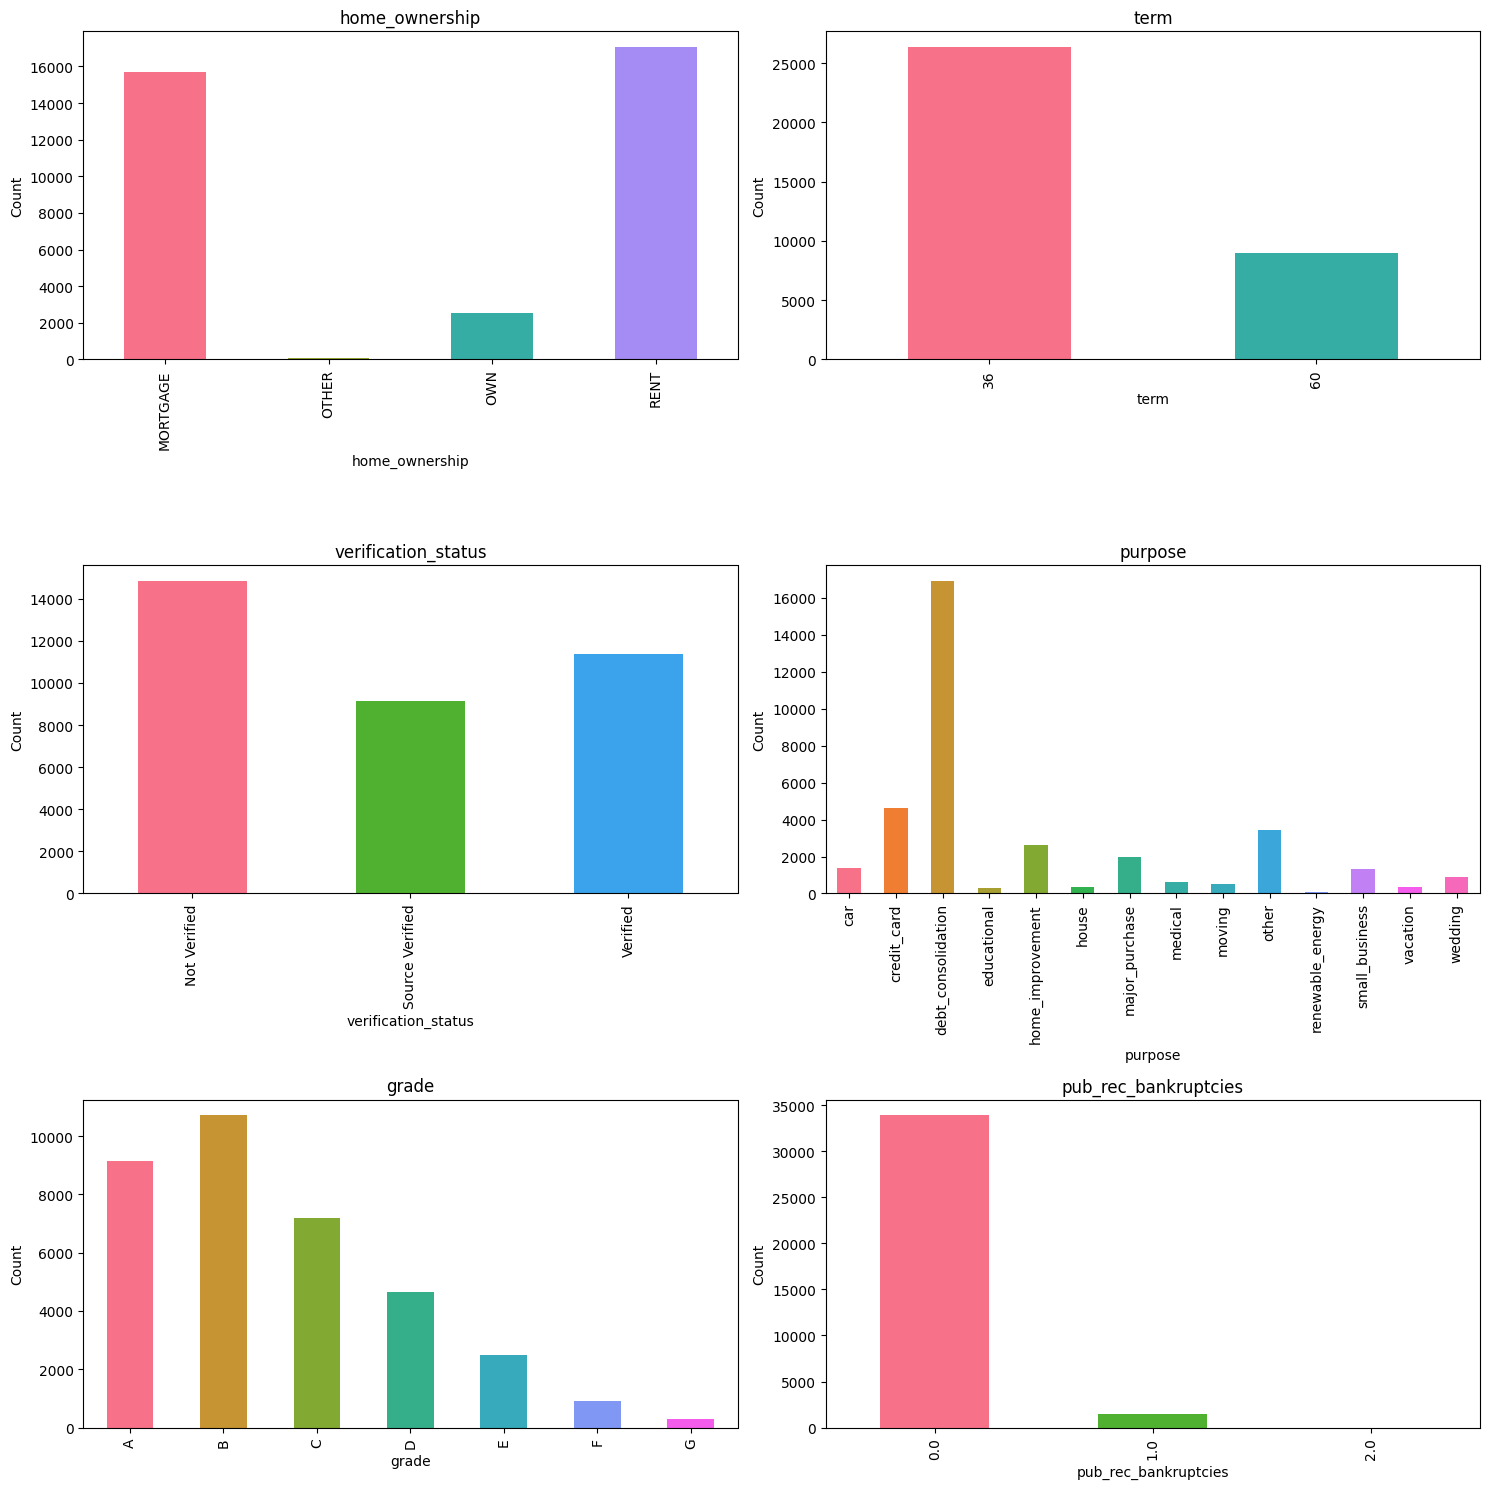

In [79]:
plt.figure(figsize=(15,15))

categorical_bar_plots(final_loan_data, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

<Figure size 1000x500 with 0 Axes>

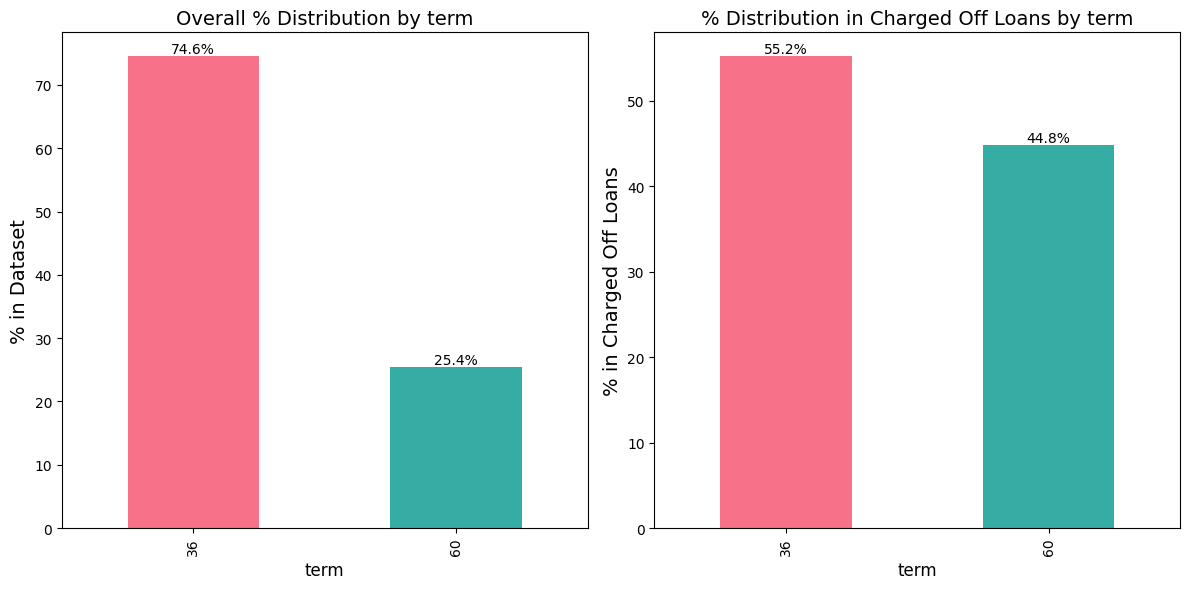

In [80]:
plt.figure(figsize=(10,5))
plot_percentage_distributions(final_loan_data, 'term')

#### Observation :

Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.


purpose : A category provided by the borrower for the loan request.

<Figure size 2000x600 with 0 Axes>

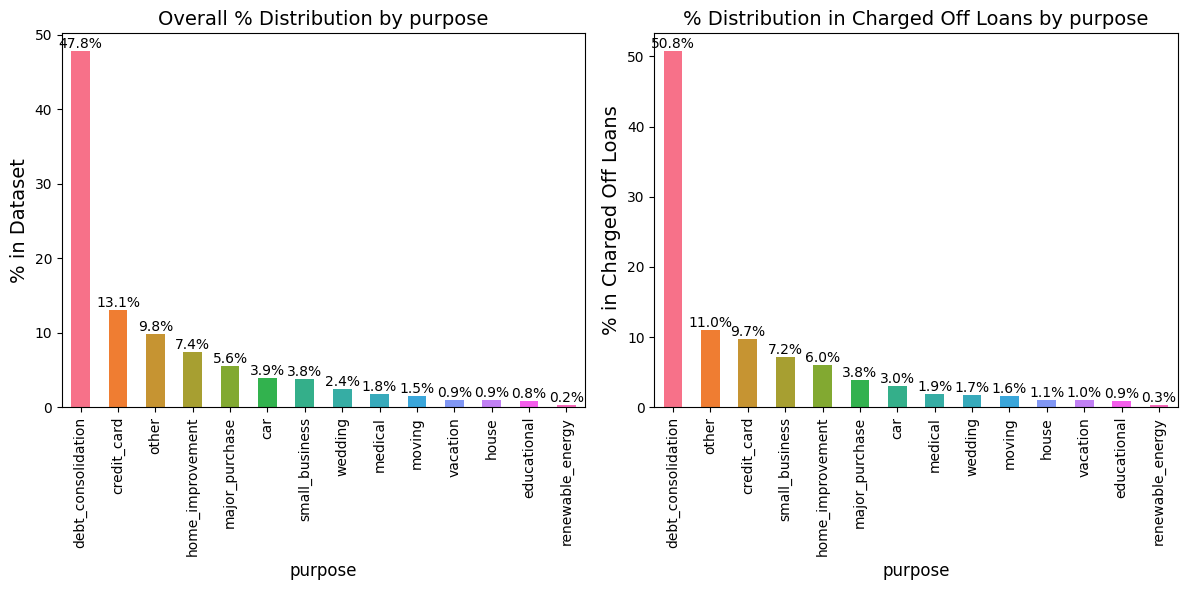

In [81]:
plt.figure(figsize=(20,6))
plot_percentage_distributions(final_loan_data, 'purpose')

#### Observation :

The category small_business percentage doubles from 3.8 to 7.2 for Charged Off loans. Let's see how the categories of this variable behave.


<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by purpose'}, xlabel='purpose', ylabel='Percentage of Loans (Charged Off)'>

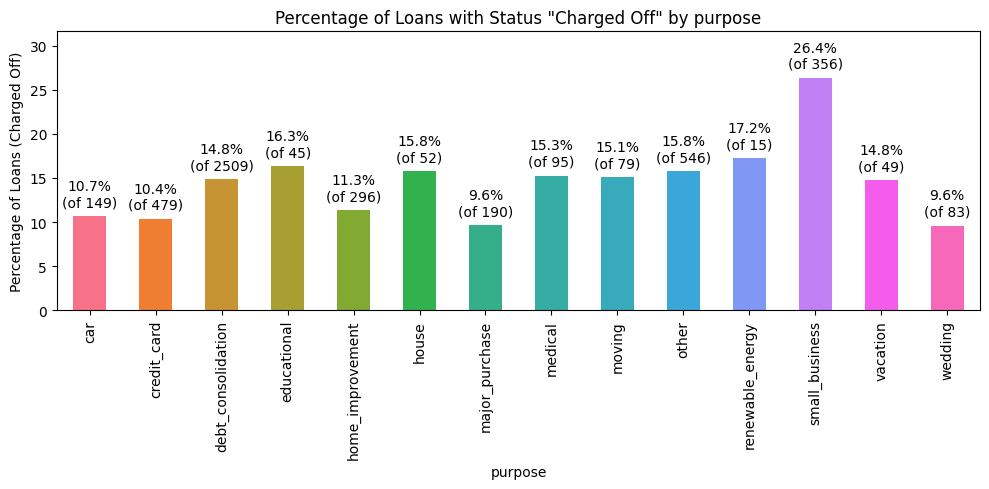

In [82]:
plt.figure(figsize=(10, 5))
plot_loan_status_by_percent(final_loan_data, 'purpose')

#### Observation :

26.4 % of loans for small business are Charged Off. Making them the most risky purpose.
Approximately 50% of the loans are issued for the purpose of dept consolidation.
17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.


pub_rec_bankruptcy : Number of public record bankruptcies

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by pub_rec_bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='Percentage of Loans (Charged Off)'>

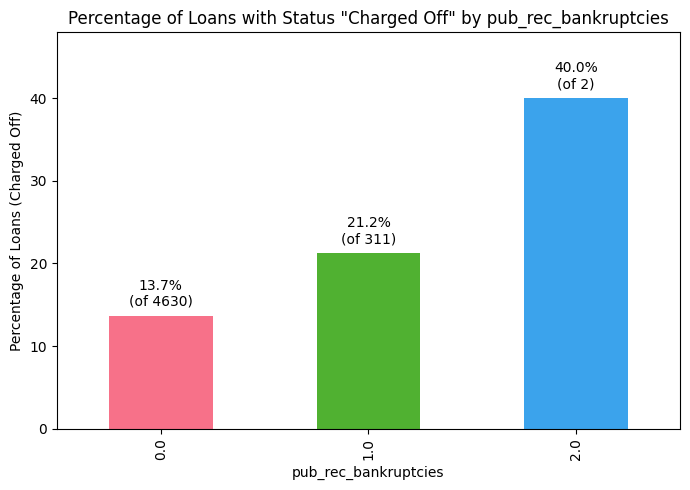

In [83]:
plt.figure(figsize=(7,5))
plot_loan_status_by_percent(final_loan_data, 'pub_rec_bankruptcies')

#### Observation :

The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.


int_rate : Interest Rate on the loan.

In [84]:
final_loan_data.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [85]:
def plot_distribution_on_columns(dataframe, column):
    """
    Visualizes the distribution of a numerical column using a histogram with a kernel density estimate (KDE)
    and a box plot grouped by loan status.

    Args:
    - dataframe (pd.DataFrame): The input DataFrame containing the data.
    - column (str): The numerical column to visualize.

    Returns:
    - None (displays the plots).
    """
    # Set up the figure with two subplots
    plt.figure(figsize=(15, 5))  # Adjust the size of the figure

    # Subplot 1: Distribution plot (histogram + KDE)
    plt.subplot(1, 2, 1)
    ax = sns.histplot(dataframe[column], kde=True, color='cadetblue', bins=30)
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Subplot 2: Box plot of the column grouped by loan_status
    plt.subplot(1, 2, 2)
    ax = sns.boxplot(x=dataframe[column], y=dataframe['loan_status'], palette='husl')
    ax.set_title(f'{column} Distribution by Loan Status', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Loan Status', fontsize=12)

    # Display the plots
    plt.tight_layout()
    plt.show()

<Figure size 1500x500 with 0 Axes>

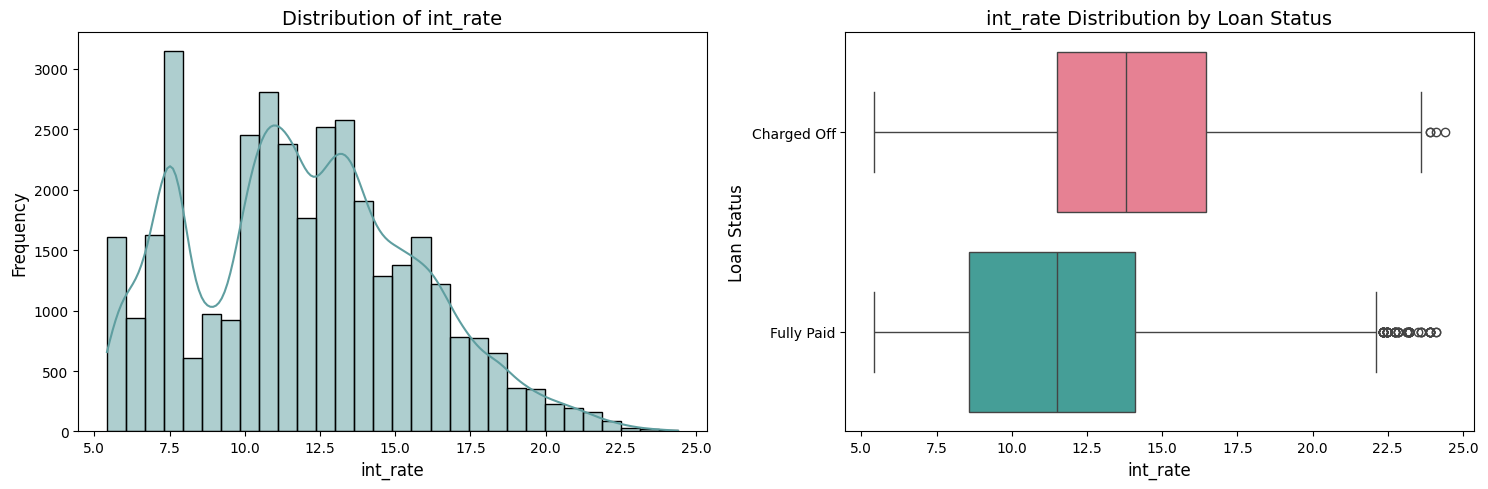

In [86]:
plt.figure(figsize=(15,5))
plot_distribution_on_columns(final_loan_data, 'int_rate')

In [87]:
final_loan_data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


#### Observation :

Overall, the interest rate varies from 5.42% to 24.4% with average interest rate of 11.66%.
The interest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more

In [88]:
final_loan_data['interest_rate_buckets'] = round(final_loan_data['int_rate'])

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by interest_rate_buckets'}, xlabel='interest_rate_buckets', ylabel='Percentage of Loans (Charged Off)'>

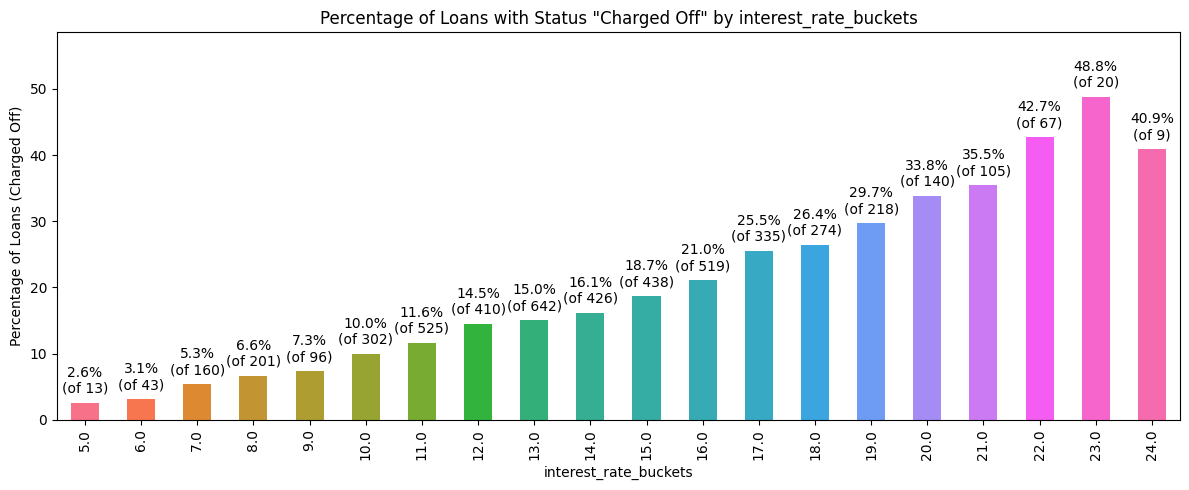

In [89]:
plt.figure(figsize=(12,5))
plot_loan_status_by_percent(final_loan_data, 'interest_rate_buckets')

installment : The monthly payment owed by the borrower if the loan originates.

In [90]:
final_loan_data.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1500x500 with 0 Axes>

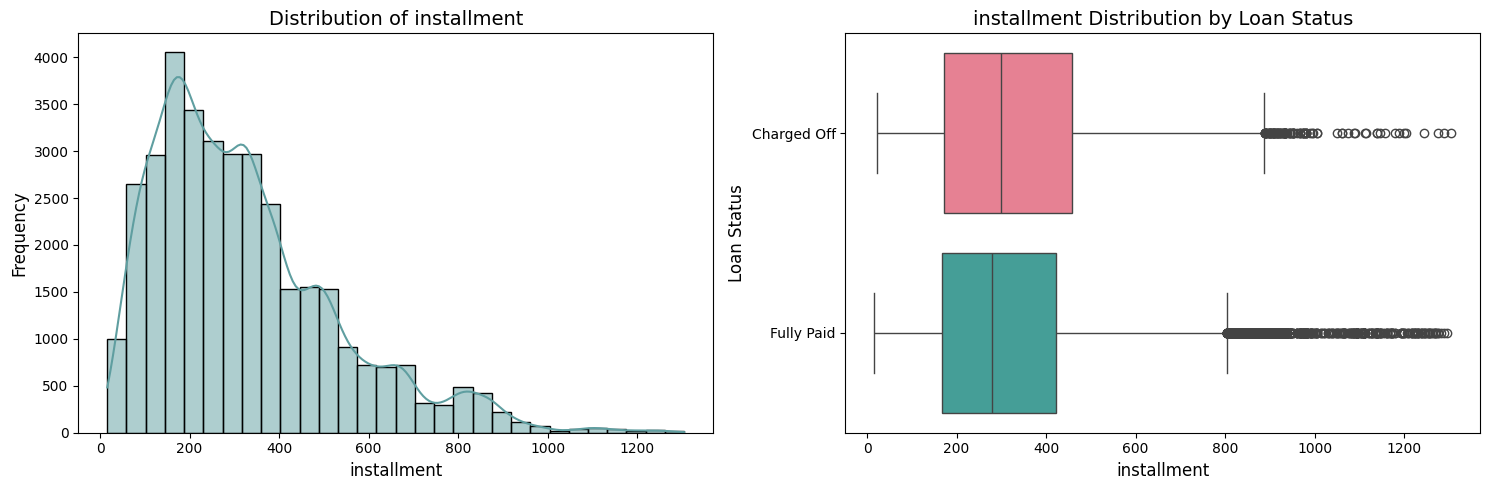

In [91]:
plt.figure(figsize=(15,5))
plot_distribution_on_columns(final_loan_data, 'installment')

In [92]:
final_loan_data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


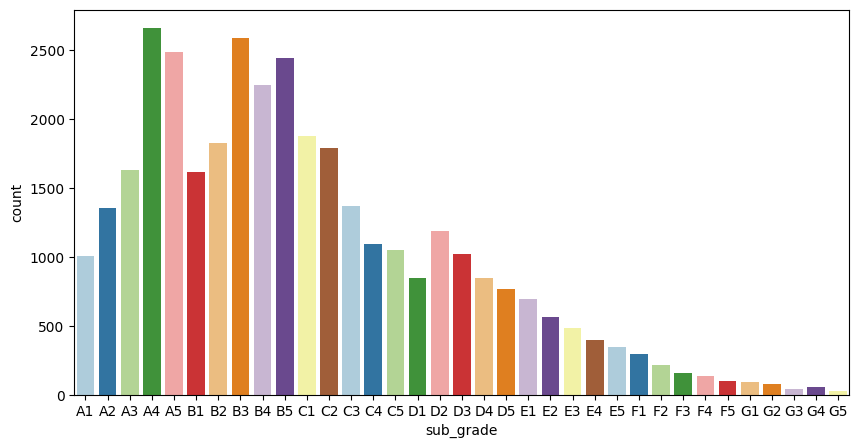

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x = final_loan_data['sub_grade'], order=sorted(final_loan_data.sub_grade.unique()), palette="Paired")
plt.show()

# Bivariate Analysis

#### Categorizing using Grade
        This data will make us understand which grades are safer.

<Figure size 1500x500 with 0 Axes>

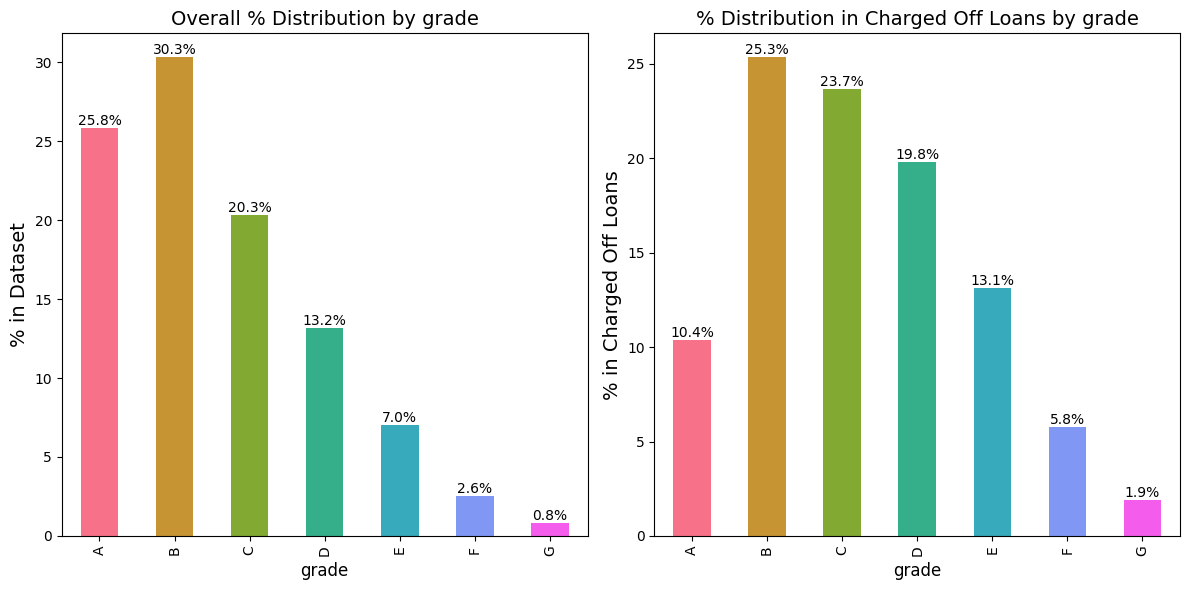

In [94]:
plt.figure(figsize=(15,5))
plot_percentage_distributions(final_loan_data, 'grade', True)

#### Observation

        The grades A, B and C are safer than D, E and F. Lets now calculate the percentage of Loans charged off per grade.

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by grade'}, xlabel='grade', ylabel='Percentage of Loans (Charged Off)'>

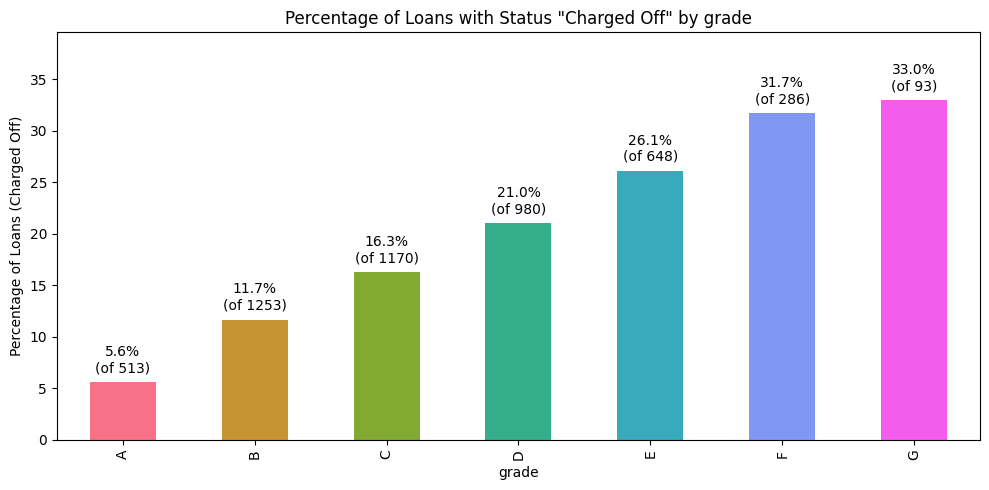

In [95]:
plt.figure(figsize=(10,5))
plot_loan_status_by_percent(final_loan_data, 'grade')

#### Observation :

Nearly 30% of all loans in Grades F and G see a default.
Grade E onwards are risky, and less numerous. Lending Club should either refuse loans or charge high interest rates.

In [96]:
def plot_boxplot(dataframe, column, by, figsize=(10, 5), rotation=90):
    """
    Plots a boxplot for a specified column grouped by another column.

    Args:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column (str): The numerical column to visualize in the boxplot.
    - by (str): The categorical column to group by.
    - figsize (tuple): The size of the figure (default is (10, 5)).
    - rotation (int): The rotation angle for x-axis labels (default is 90).

    Returns:
    - ax: Matplotlib Axes object for the boxplot.
    """
    fig, ax = plt.subplots(figsize=figsize)  # Create a figure with the specified size
    dataframe.boxplot(column=column, by=by, ax=ax, rot=rotation)  # Generate the boxplot
    
    # Set titles and labels for clarity
    ax.set_title(f'{column} Distribution by {by}', fontsize=14)
    ax.set_xlabel(by, fontsize=12)
    ax.set_ylabel(column, fontsize=12)
    plt.suptitle('')  # Remove the default title added by pandas
    plt.tight_layout()
    plt.show()
    return ax

As per our analysis above we need to check if the Lending Club is charging more for the different grades or not.

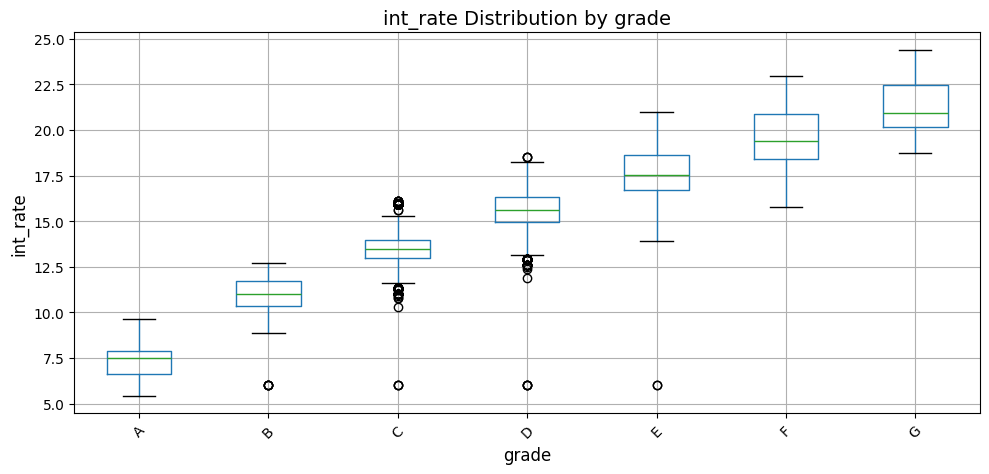

<Axes: title={'center': 'int_rate Distribution by grade'}, xlabel='grade', ylabel='int_rate'>

In [97]:
plot_boxplot(final_loan_data, column='int_rate', by='grade', figsize=(10, 5), rotation=45)

#### Observation : 
        Yes, we can see in the above box plot that the Lending Club is charging the more depending on the above analysis for Grades F and G which had more than 30% defaulters.

#### Employer Title vs Number Of Employees : 
        Lets analyse the number of employees per Employer.

In [98]:
# top 10 employee
top_10_emp_title = final_loan_data.emp_title.value_counts(normalize=False).head(10)

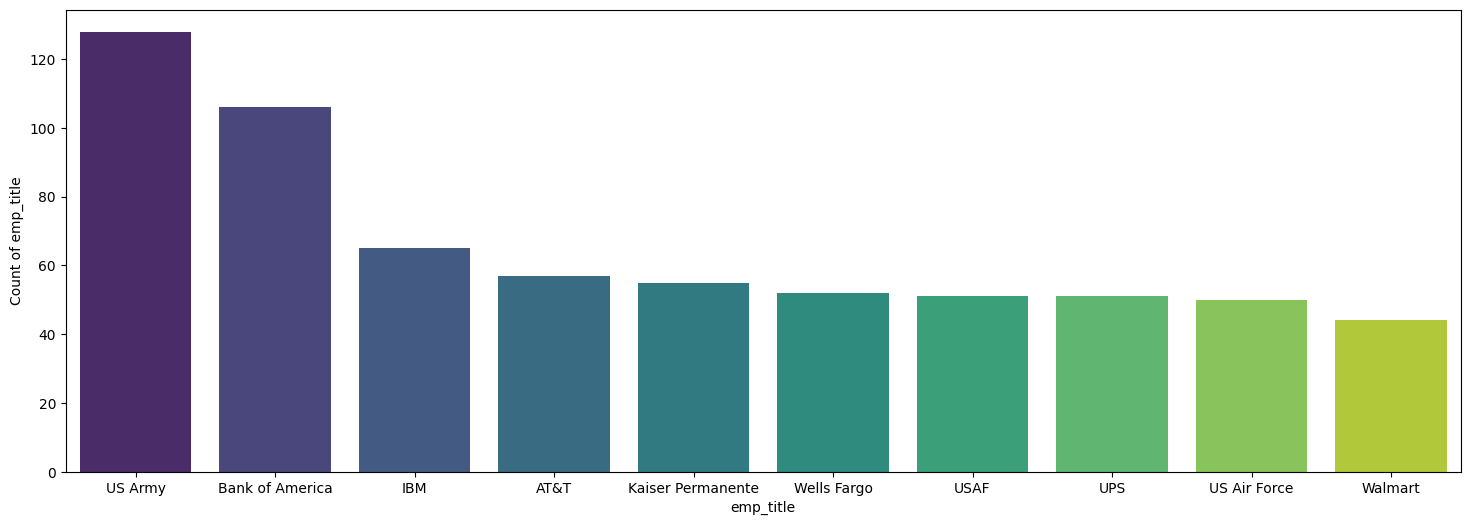

In [99]:
plt.figure(figsize=(18,6))
a=sns.barplot(x=top_10_emp_title.index, y=top_10_emp_title.values, palette="viridis")
a.set_ylabel('Count of emp_title')
plt.show()

#### Observation :

From the above data we can easily makeout that the loans are being taken by employees from the companies US Army, Bank Of America, IBM others.

Now lets analyse the data to check whats the percentage of Employees whose loans are charged off.

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by emp_title'}, xlabel='emp_title', ylabel='Percentage of Loans (Charged Off)'>

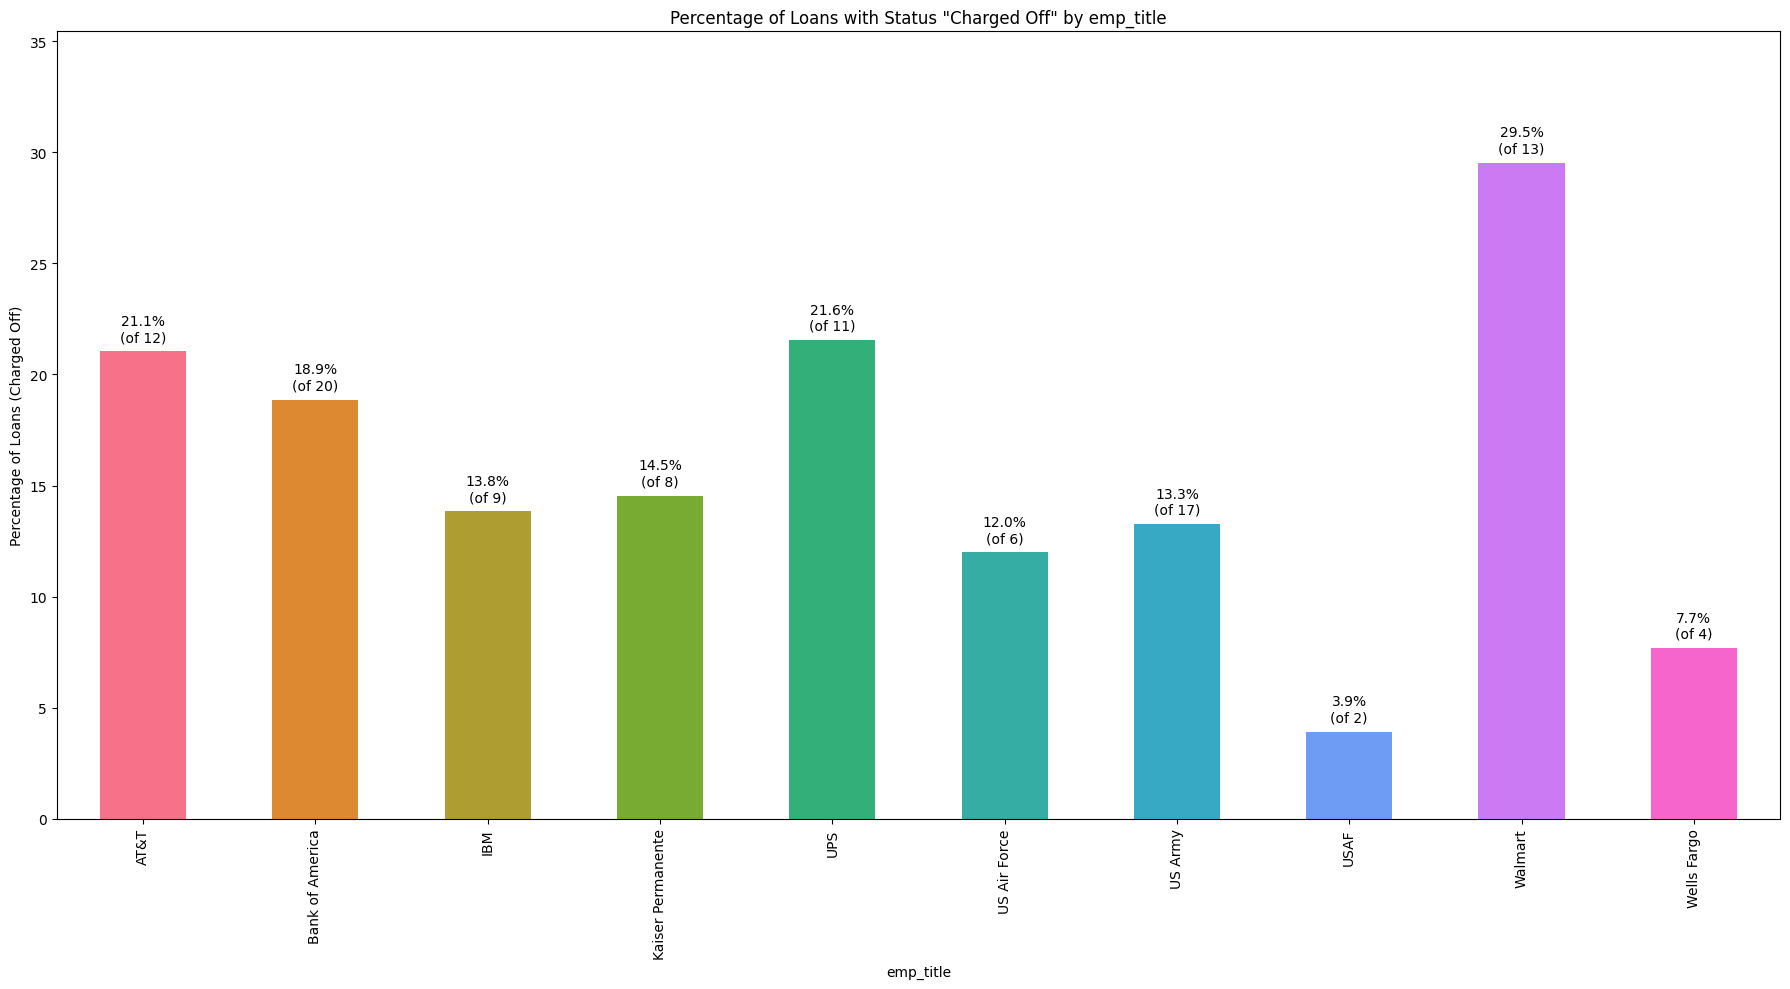

In [100]:
plt.figure(figsize=(18,10))
plot_loan_status_by_percent(final_loan_data[final_loan_data['emp_title'].isin(top_10_emp_title.index.values)], 'emp_title')

In [101]:
final_loan_data.emp_length.value_counts(normalize=True)

emp_length
10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: proportion, dtype: float64

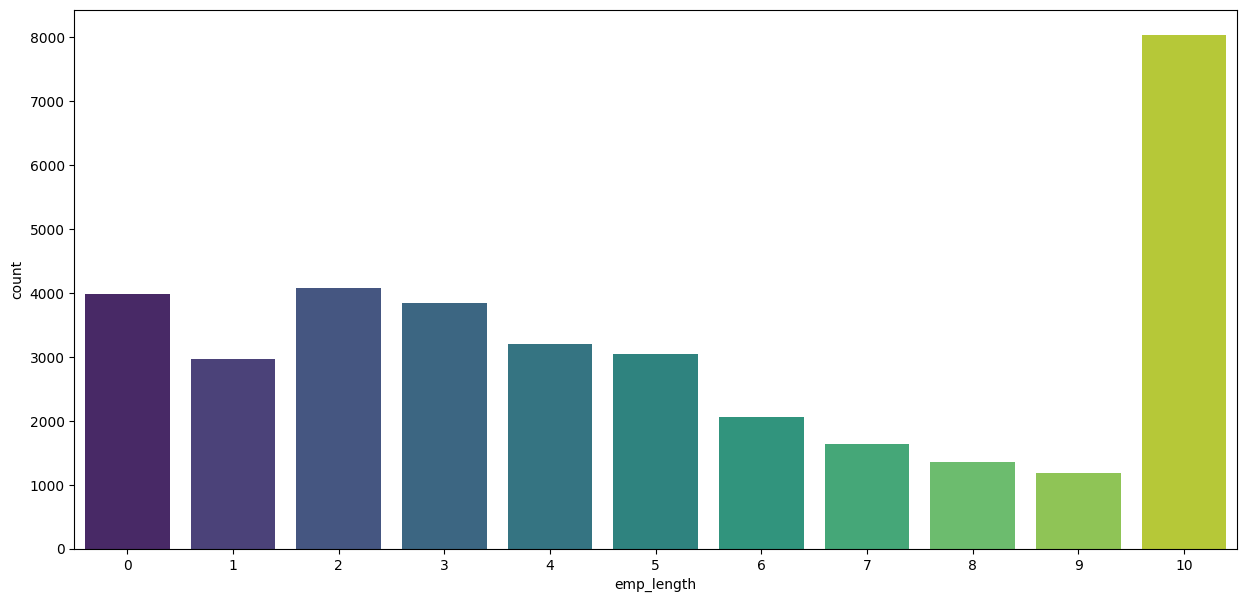

In [102]:
plt.figure(figsize=(15,7))
sns.countplot(x = final_loan_data['emp_length'], order=sorted(final_loan_data.emp_length.unique()), palette="viridis")
plt.show()

<Figure size 1500x500 with 0 Axes>

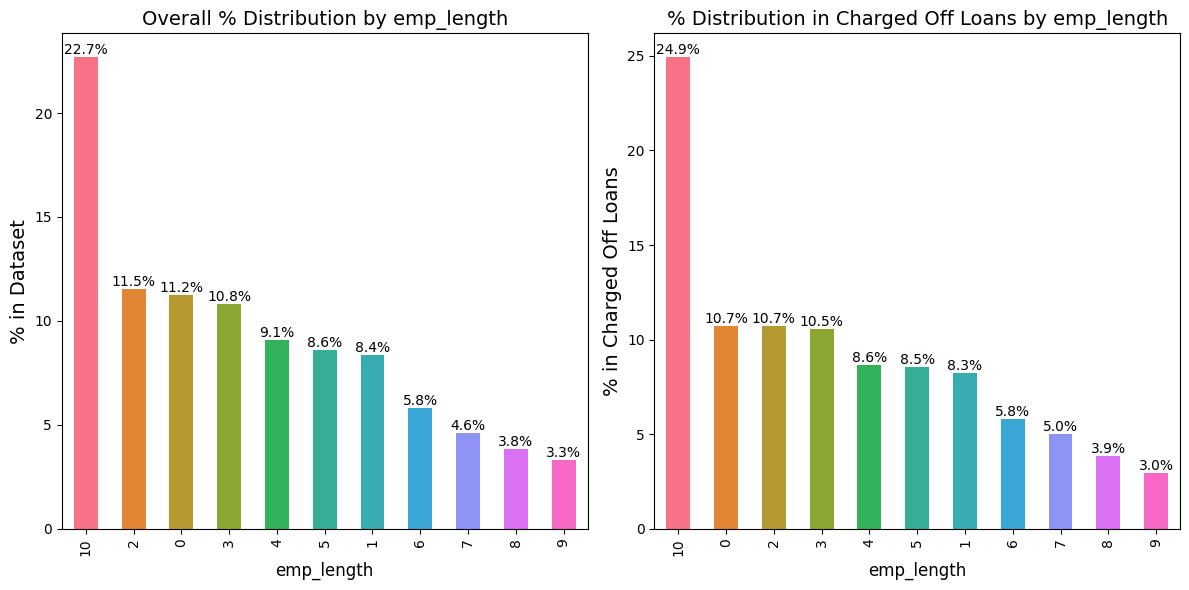

In [103]:
plt.figure(figsize=(15, 5))
plot_percentage_distributions(final_loan_data, 'emp_length')

#### Observation :

22.7% of the of loan taker have an employment length of more than 10 years.
There is no impact of employment length to chance of loan default.

#### Home Ownership :
    home_ownership : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

<Figure size 1000x500 with 0 Axes>

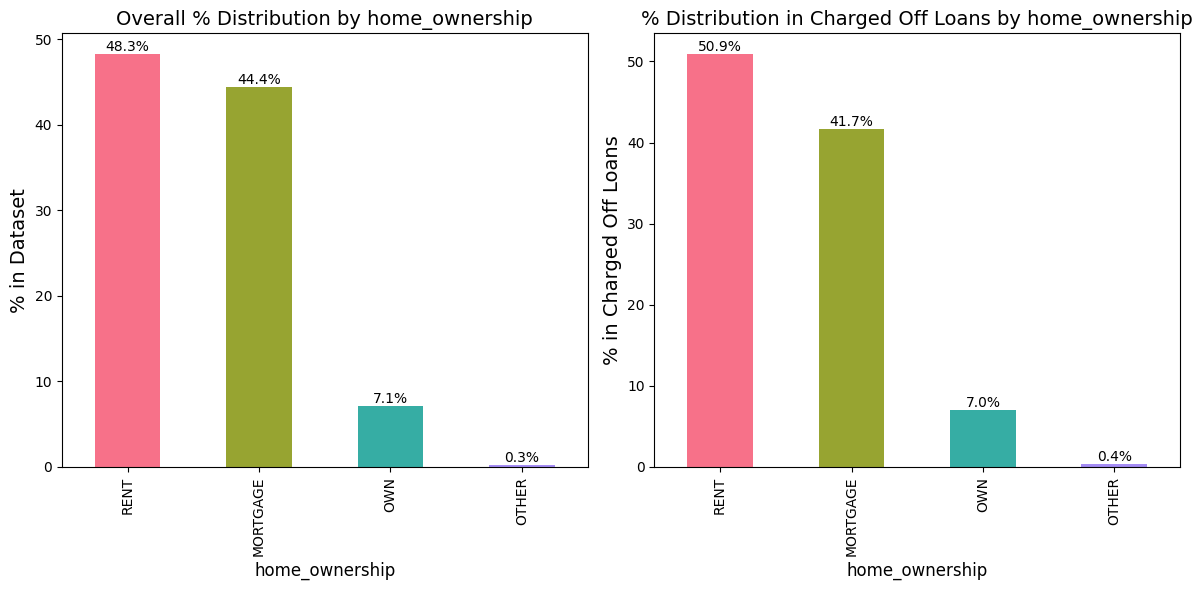

In [104]:
plt.figure(figsize=(10,5))
plot_percentage_distributions(final_loan_data, 'home_ownership')

#### Observation :

There is no impact of home_ownership to default on loan. So we need to consider other criteria.

#### Annual Income
    annual_inc : The self-reported annual income provided by the borrower during registration. Let's analyse Annual Income if its really adding any value to the analysis.

In [105]:
final_loan_data.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Outliers
    Let's get rid of outliers to analyze annual income. 
    Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [106]:
final_loan_data = final_loan_data[np.abs(final_loan_data.annual_inc-final_loan_data.annual_inc.mean()) <= (3*final_loan_data.annual_inc.std())]

In [107]:
final_loan_data.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

In [108]:
def plot_distribution_with_ticks(dataframe, column, figsize=(15, 5), xtick_interval=20000, log_scale=False):
    """
    Plots the distribution of a numerical column with custom x-ticks.

    Args:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column (str): The column to visualize.
    - figsize (tuple): The size of the figure (default is (15, 5)).
    - xtick_interval (int): Interval for x-axis ticks (default is 20000).
    - log_scale (bool): Whether to use a logarithmic scale for the histogram (default is False).

    Returns:
    - ax: Matplotlib Axes object of the plot.
    """
    plt.figure(figsize=figsize)
    
    # Plot the distribution using Seaborn
    ax = sns.histplot(data=dataframe, x=column, kde=True, log_scale=log_scale, color='mediumspringgreen')
    
    # Configure x-ticks
    max_value = dataframe[column].max()
    plt.xticks(np.arange(0, max_value + xtick_interval, xtick_interval))
    
    # Set labels and title
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    return ax

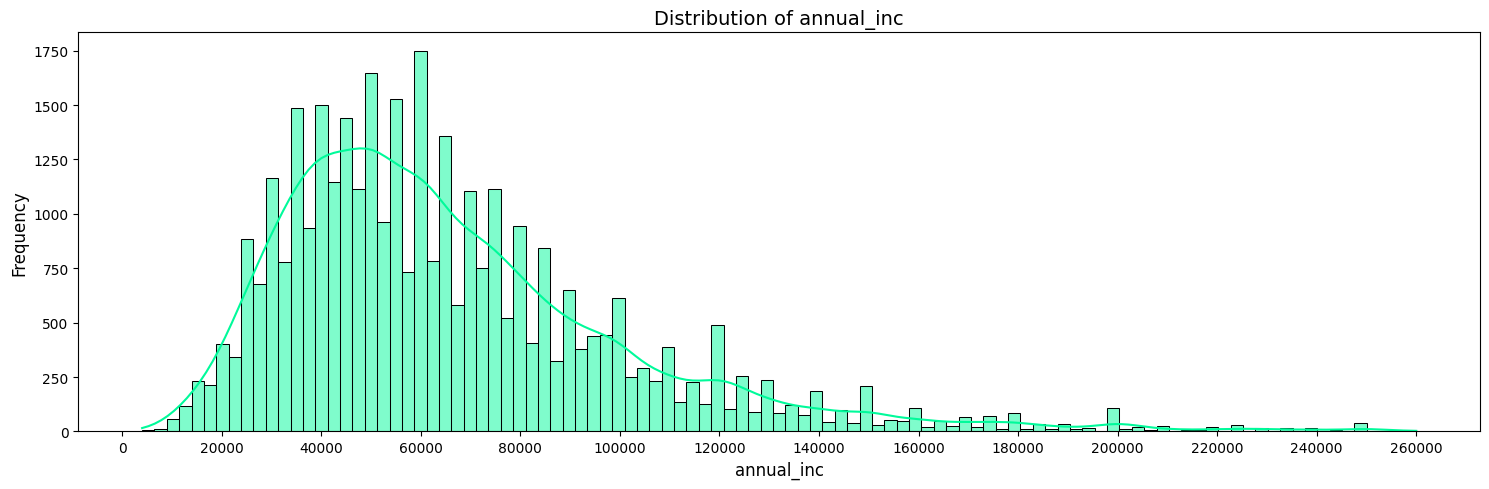

<Axes: title={'center': 'Distribution of annual_inc'}, xlabel='annual_inc', ylabel='Frequency'>

In [109]:
plot_distribution_with_ticks(final_loan_data, column='annual_inc', xtick_interval=20000, log_scale=False)

#### Observation : 
        We can see that the bin size 10000 (income) looks good since the data is distributed properly.

In [110]:
#Create Derived categorical variable
final_loan_data['income_bin'] = (final_loan_data['annual_inc']/20000).astype(int)

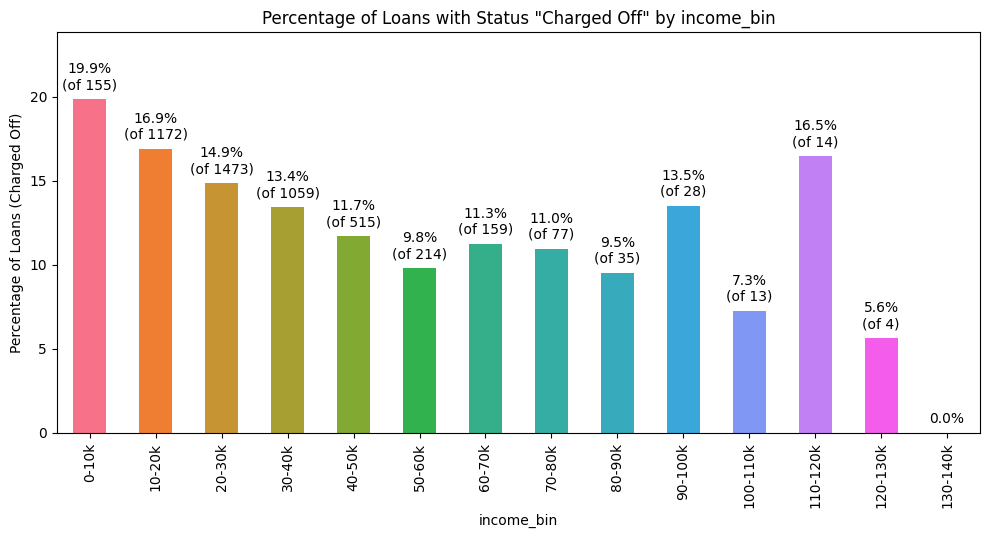

In [111]:
plt.figure(figsize=(10,5))
ax = plot_loan_status_by_percent(final_loan_data.loc[final_loan_data['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])
plt.show()

#### Observation :

Loan defaults are higher for lower income, and progressively reduce as incomes go up.
It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.


verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified

In [112]:
final_loan_data.verification_status.value_counts()

verification_status
Not Verified       14783
Verified           11251
Source Verified     9088
Name: count, dtype: int64

#### Verification Status
        Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both status can be treated as one.

<Figure size 2000x500 with 0 Axes>

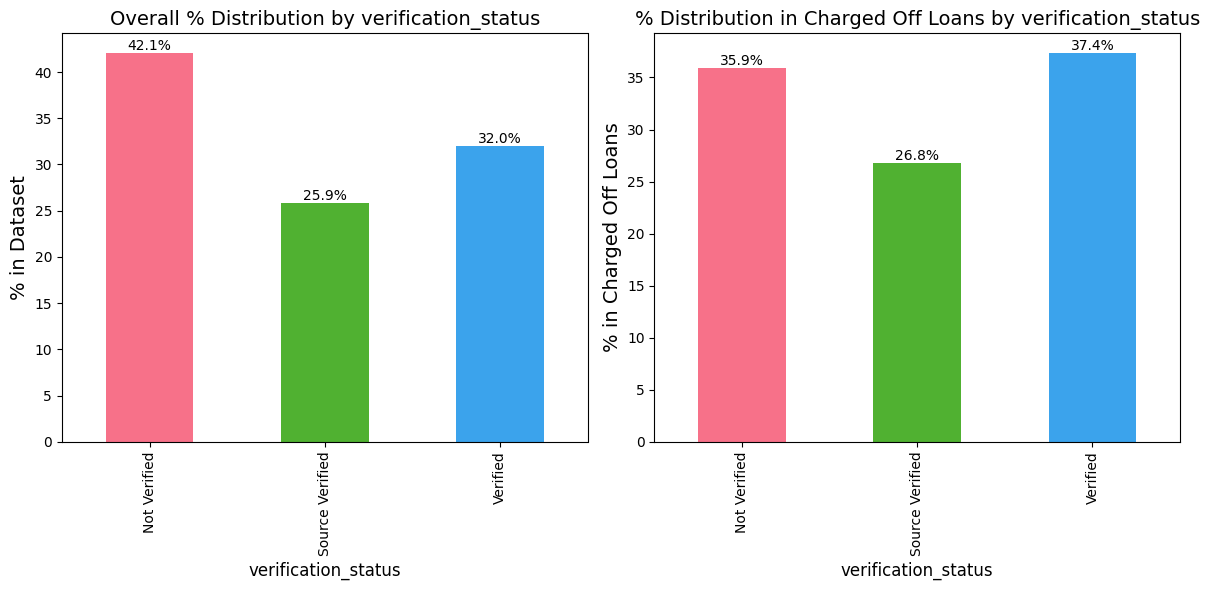

In [113]:
plt.figure(figsize=(20,5))
plot_percentage_distributions(final_loan_data, 'verification_status', True)

#### Observation :

Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.

Verified loans show more charged Off percentage as compared to Not verified loans. This is unexpected and will be investigated later in bivariate analysis

#### Loan Issuance Month
    issue_d : The month which the loan was funded

In [114]:
def plot_loan_issuance_and_status(dataframe):
    """
    Plots the distribution of loan issuance by year and month, 
    and the percentage of loan statuses by year, using the 'hue' parameter.

    Args:
    - dataframe (pd.DataFrame): The input DataFrame containing loan data.

    Returns:
    - None (displays the plots).
    """
    plt.figure(figsize=(18, 6))  # Adjust the figure size for better layout

    # Subplot 1: Loan issuance by year, colored by loan status (hue)
    plt.subplot(1, 3, 1)
    sns.countplot(
        x=dataframe['issue_d_year'],
        order=sorted(dataframe['issue_d_year'].unique()),
        hue=dataframe['loan_status'],  # Add 'hue' to distinguish loan statuses
        palette='Greens'
    )
    plt.title('Loan Issuance by Year (with Loan Status)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Subplot 2: Loan issuance by month, colored by loan status (hue)
    plt.subplot(1, 3, 2)
    sns.countplot(
        x=dataframe['issue_d_month'],
        order=sorted(dataframe['issue_d_month'].unique()),
        hue=dataframe['loan_status'],  # Add 'hue' to distinguish loan statuses
        palette='Blues'
    )
    plt.title('Loan Issuance by Month (with Loan Status)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Subplot 3: Percentage of loan statuses by year (assuming plot_loan_status_by_percent function handles this)
    plt.subplot(1, 3, 3)
    plot_loan_status_by_percent(dataframe, 'issue_d_year')  # Custom function assumed to be defined
    plt.title('Loan Status by Year (%)', fontsize=14)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

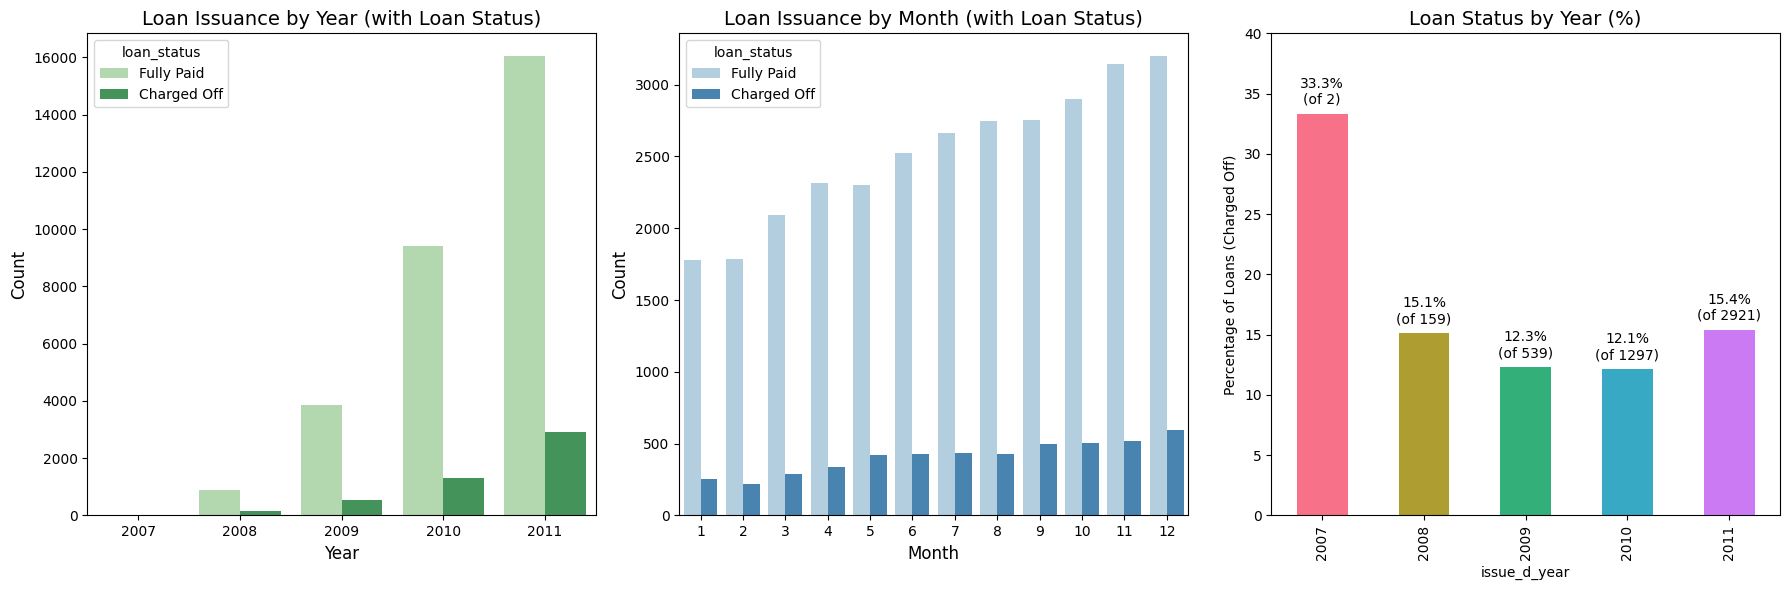

In [115]:
plot_loan_issuance_and_status(final_loan_data)

#### Observation :

If we consider the above analysis we can see that from Aug,2007 to 2011 the loans issued have risen significantly.
Within a year, the number of loan issued rises over the month from jan to December.

The 12th month has the highest and lets plot by month now.

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by issue_d_month'}, xlabel='issue_d_month', ylabel='Percentage of Loans (Charged Off)'>

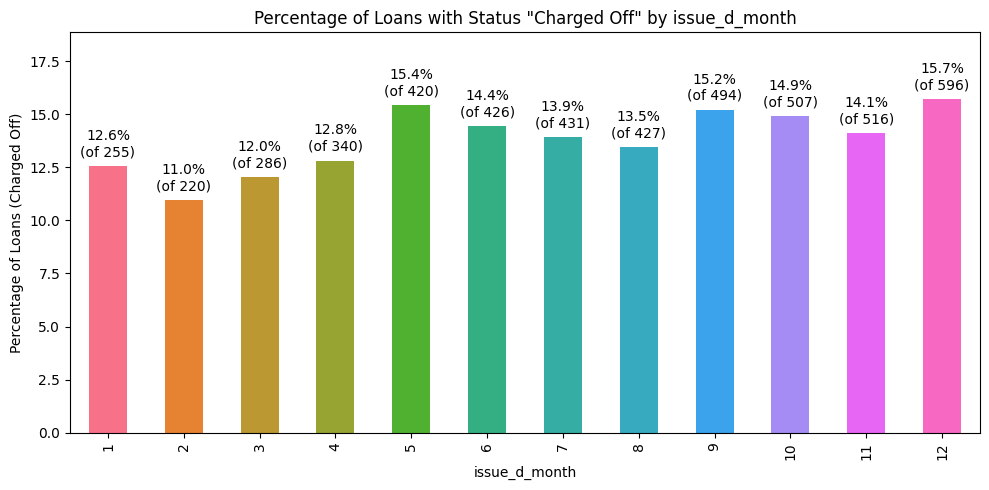

In [116]:
plt.figure(figsize=(10, 5))
plot_loan_status_by_percent(final_loan_data, 'issue_d_month')

#### Observation:

Month of loan is spread out and has no significant effect.

#### Title
        Lets analyse on the Title now.

In [117]:
final_loan_data.title.describe()

count                  35122
unique                 17559
top       Debt Consolidation
freq                    1962
Name: title, dtype: object

In [118]:
final_loan_data.title.value_counts().head(10)

title
Debt Consolidation           1962
Debt Consolidation Loan      1533
Personal Loan                 583
Consolidation                 458
debt consolidation            435
Credit Card Consolidation     325
Home Improvement              322
Debt consolidation            302
Credit Card Loan              280
Personal                      278
Name: count, dtype: int64

#### Observation :

title column has 17559 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.


In [119]:
final_loan_data = final_loan_data.drop('title',axis =1 )

addr_state : The state provided by the borrower in the loan application

In [120]:
final_loan_data.addr_state.value_counts(normalize=True).head(10)

addr_state
CA    0.180998
NY    0.095667
FL    0.071664
TX    0.069330
NJ    0.047008
PA    0.038893
IL    0.038893
VA    0.035647
GA    0.035476
MA    0.033227
Name: proportion, dtype: float64

In [121]:
def plot_loan_status_by_state(dataframe):
    """
    Plots the distribution of loans by state, showing the fraction of charged-off and fully paid loans
    for each state.

    Args:
    - dataframe (pd.DataFrame): The input DataFrame containing loan data.
    
    Returns:
    - None (displays the plots).
    """
    plt.figure(figsize=(30, 5))  # Set figure size for the first plot

    # Subplot 1: Count of loans by state
    plt.subplot(1, 2, 1)
    sns.countplot(
        x=dataframe['addr_state'],
        order=sorted(dataframe['addr_state'].unique()),
        palette="viridis"
    )
    plt.title('Loan Count by State', fontsize=16)
    plt.xlabel('State', fontsize=14)
    plt.ylabel('Count of Loans', fontsize=14)

    # Calculate the fraction of Charged Off and Fully Paid loans by state
    charge_off_count = dataframe.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:, 'Charged Off']
    fully_paid_count = dataframe.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:, 'Fully Paid']

    # Create a larger figure for the bar plot
    plt.figure(figsize=(30, 10))  # Set figure size for the second plot

    # Subplot 2: Fraction of charged-off loans by state
    plt.subplot(2, 2, 1)
    ax = sns.barplot(
        x=charge_off_count.index,
        y=charge_off_count.values,
        palette='viridis'
    )
    ax.set_ylabel('Fraction of Loans Charged-Off', fontsize=14)
    ax.set_title('Fraction of Charged-Off Loans by State', fontsize=16)
    
    # Optional: Plot fully paid loans if needed
    plt.subplot(2, 2, 2)
    ax2 = sns.barplot(
        x=fully_paid_count.index,
        y=fully_paid_count.values,
        palette='viridis'
    )
    ax2.set_ylabel('Fraction of Loans Fully Paid', fontsize=14)
    ax2.set_title('Fraction of Fully Paid Loans by State', fontsize=16)

    plt.tight_layout()
    plt.show()

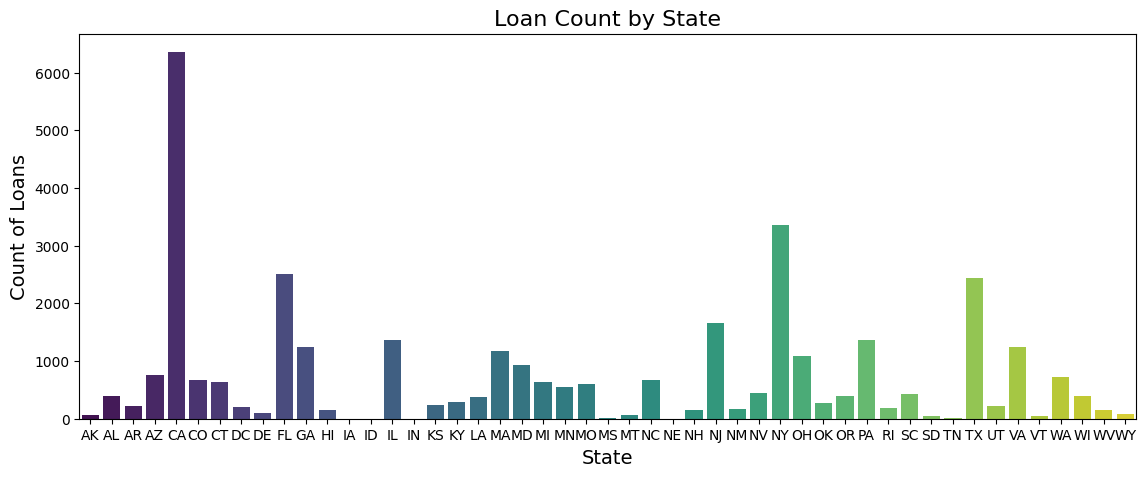

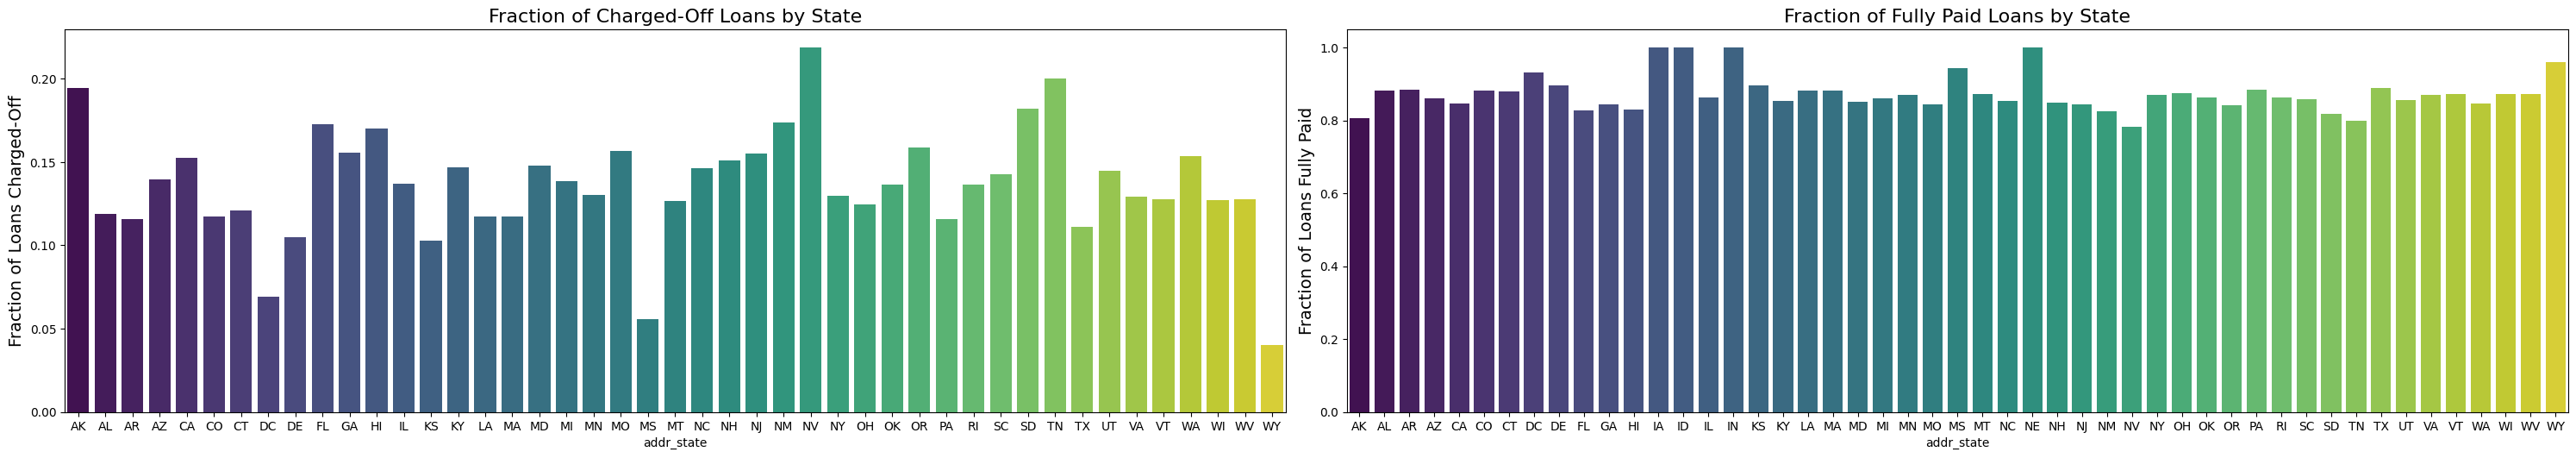

In [122]:
plot_loan_status_by_state(final_loan_data)

#### Observation :

Maximum loans from California, New york state and Florida.


dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [123]:
final_loan_data.dti.describe()

count    35122.000000
mean        13.450477
std          6.622189
min          0.000000
25%          8.380000
50%         13.550000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

<Figure size 1000x500 with 0 Axes>

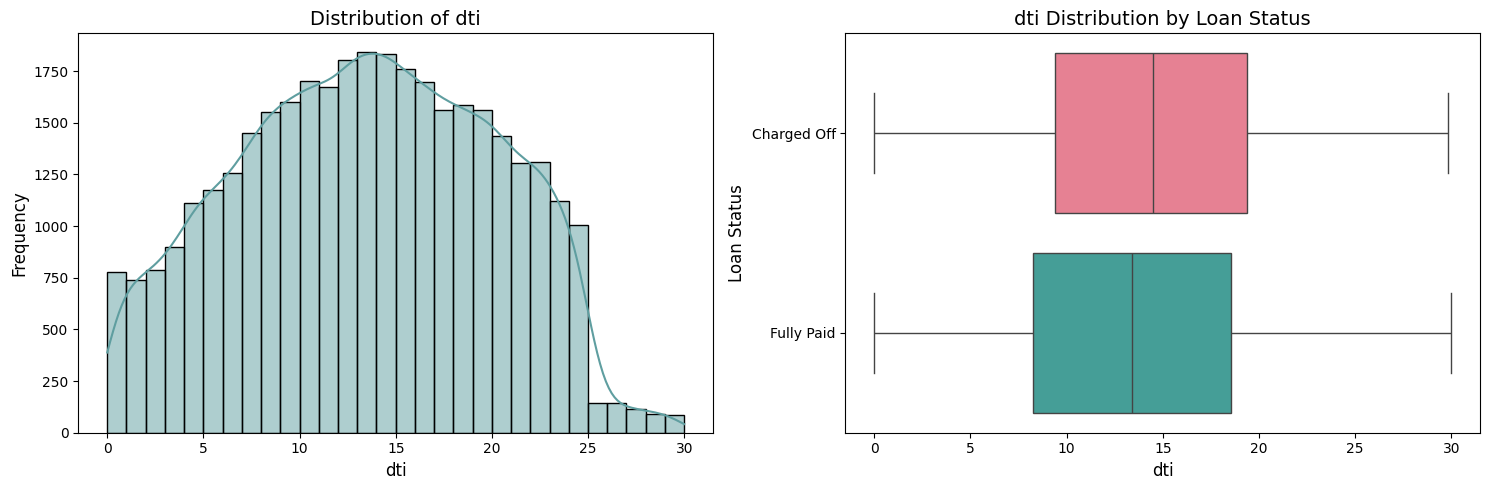

In [124]:
plt.figure(figsize=(10,5))

plot_distribution_on_columns(final_loan_data, 'dti')

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by dti_bin'}, xlabel='dti_bin', ylabel='Percentage of Loans (Charged Off)'>

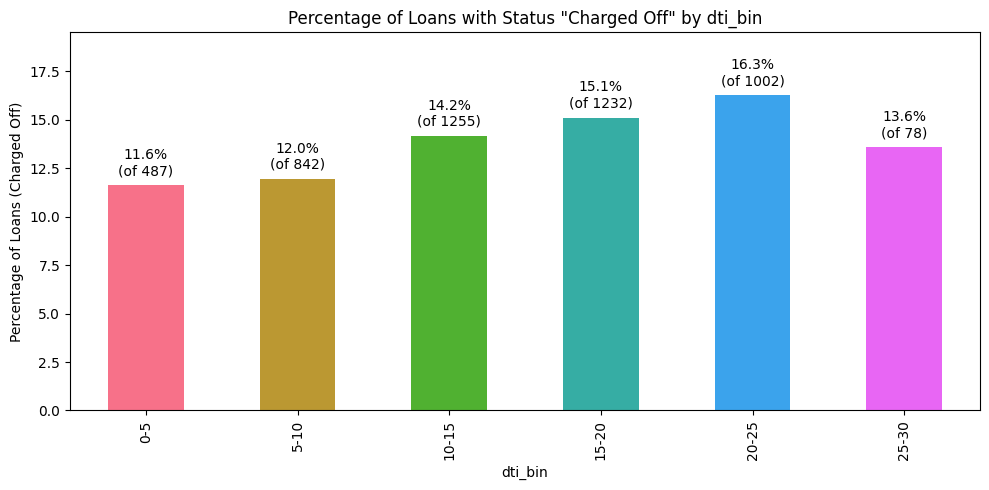

In [125]:
# Create derived variable 
final_loan_data['dti_bin'] = pd.cut(final_loan_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
plt.figure(figsize=(10,5))
plot_loan_status_by_percent(final_loan_data, 'dti_bin')

#### Observation :

When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
Higher the dti higher the chances of loan being Charged Off


delinq_2yrs : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [126]:
final_loan_data.delinq_2yrs.value_counts(normalize=True)

delinq_2yrs
0     0.892062
1     0.082854
2     0.017226
3     0.005267
4     0.001481
5     0.000598
6     0.000285
7     0.000114
8     0.000057
9     0.000028
11    0.000028
Name: proportion, dtype: float64

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by delinq_2yrs'}, xlabel='delinq_2yrs', ylabel='Percentage of Loans (Charged Off)'>

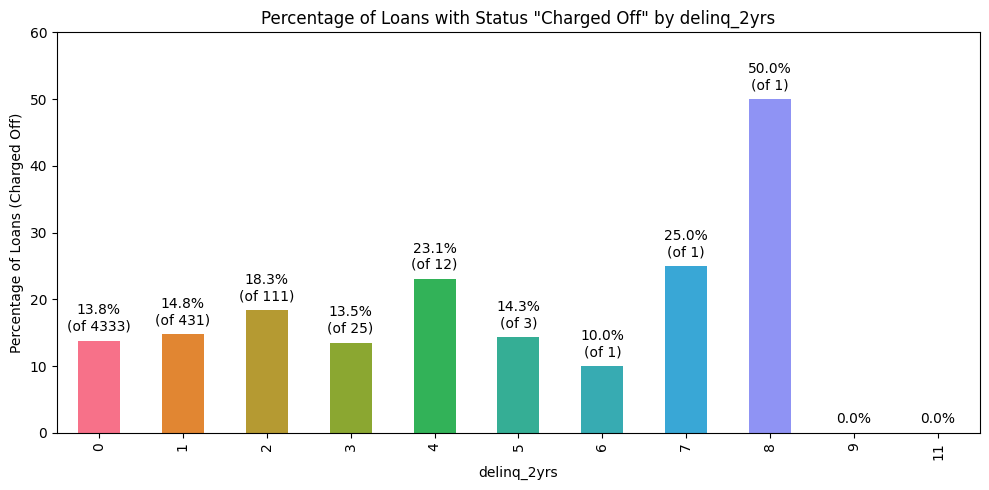

In [127]:
plt.figure(figsize=(10,5))
plot_loan_status_by_percent(final_loan_data, 'delinq_2yrs')

#### The Number Of Inquiries
        inq_last_6mths : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [128]:
final_loan_data.inq_last_6mths.value_counts(normalize=True)

inq_last_6mths
0    0.486276
1    0.276266
2    0.147258
3    0.076192
4    0.007858
5    0.003502
6    0.001509
7    0.000854
8    0.000285
Name: proportion, dtype: float64

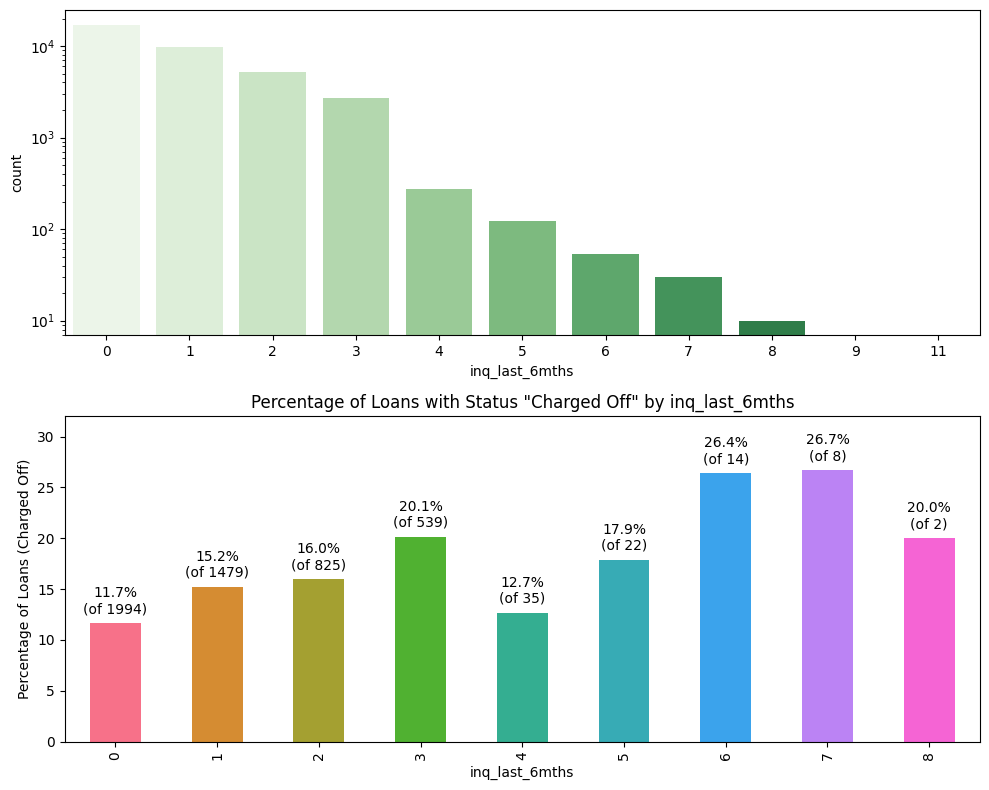

In [129]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
c=sns.countplot(x = final_loan_data['inq_last_6mths'], order=sorted(final_loan_data.delinq_2yrs.unique()), palette="Greens")
c.set_yscale('log')

plt.subplot(2, 1, 2)
plot_loan_status_by_percent(final_loan_data, 'inq_last_6mths')
plt.show()

#### Observation :

48.5% of the borrowers do not make any inquiry
Those with more than 2 inquiries default at higher rates.
This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.

open_acc : The number of open credit lines in the borrower's credit file.

In [130]:
final_loan_data.open_acc.describe()

count    35122.000000
mean         9.318205
std          4.367105
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

<Figure size 1500x500 with 0 Axes>

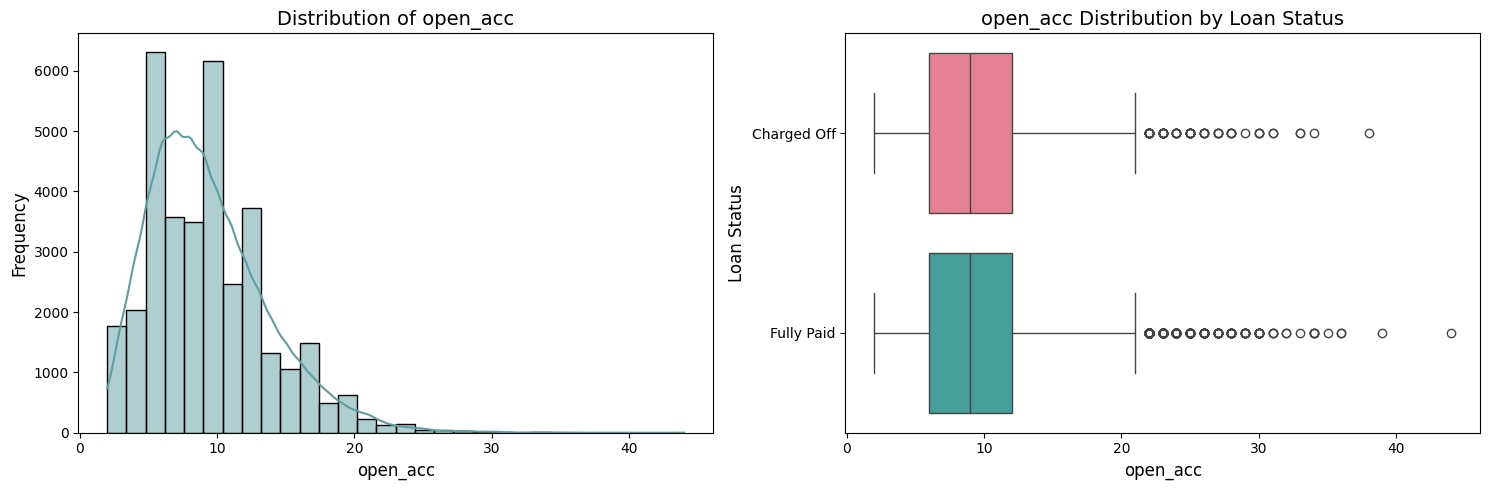

In [131]:
plt.figure(figsize=(15,5))
plot_distribution_on_columns(final_loan_data, 'open_acc')
plt.show()

In [132]:
final_loan_data.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4918.0,9.293005,4.477017,2.0,6.0,9.0,12.0,38.0
Fully Paid,30204.0,9.322308,4.349007,2.0,6.0,9.0,12.0,44.0


#### Observation :

The median of the distribution suggests that by large the borrower's seem to have 9 open credit lines.
There is no significant difference in the credit lines of charged off and fully paid loans.

pub_rec : Number of derogatory public records.

In [133]:
final_loan_data.pub_rec.value_counts(normalize=True)

pub_rec
0    0.947440
1    0.051051
2    0.001253
3    0.000199
4    0.000057
Name: proportion, dtype: float64

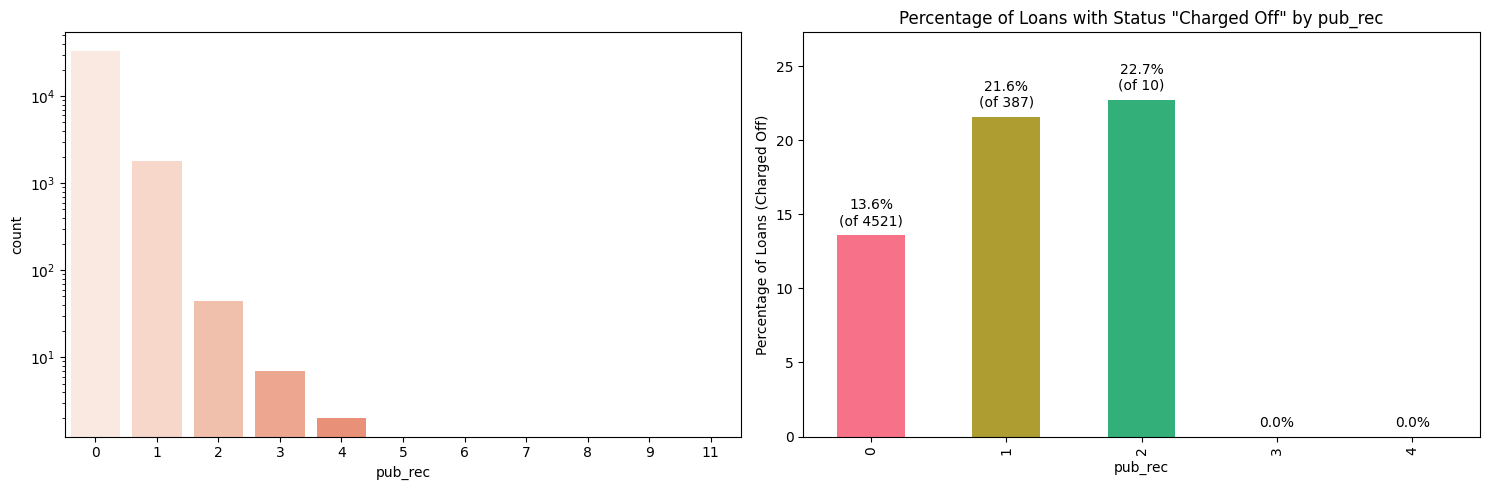

In [134]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(x =final_loan_data['pub_rec'], order=sorted(final_loan_data.delinq_2yrs.unique()), palette="Reds")
c.set_yscale('log')

plt.subplot(1, 2, 2)
plot_loan_status_by_percent(final_loan_data, 'pub_rec')
plt.show()

#### Observation :

94% have no Public derogatory records. 5% have 1 derogatory record.
Having even 1 derogatory record increases the chances of Charge Off significantly.


revol_bal : Total credit revolving balance

In [135]:
final_loan_data.revol_bal.describe()

count     35122.000000
mean      13218.112551
std       15363.470139
min           0.000000
25%        3764.250000
50%        8896.500000
75%       16951.750000
max      149588.000000
Name: revol_bal, dtype: float64

In [136]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
final_loan_data = final_loan_data[np.abs(final_loan_data.revol_bal-final_loan_data.revol_bal.mean()) <= (3*final_loan_data.revol_bal.std())]
final_loan_data['revol_bal_log'] = final_loan_data['revol_bal'].apply(lambda x : np.log(x+1))

The values vary a lot. Transforming to a log scale will help analyse better.

In [137]:
def plot_revol_bal_distribution_and_status(final_loan_data):
    """
    Plots the distribution of 'revol_bal' using both a histogram and boxplot,
    as well as a comparison of 'revol_bal' with respect to loan status.

    Args:
    - final_loan_data (pd.DataFrame): The input DataFrame containing loan data.

    Returns:
    - None (displays the plots).
    """
    plt.figure(figsize=(15, 5))  # Set figure size for the first row of plots

    # Subplot 1: Distribution of 'revol_bal' as a histogram
    plt.subplot(1, 2, 1)
    sns.histplot(final_loan_data['revol_bal'], kde=False, color='lightgreen', bins=30, edgecolor='black')
    plt.title('Distribution of Revolving Balance', fontsize=16)
    plt.xlabel('Revolving Balance', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Subplot 2: Boxplot of 'revol_bal' against loan status
    plt.subplot(1, 2, 2)
    sns.boxplot(x=final_loan_data['loan_status'], y=final_loan_data['revol_bal'], palette='coolwarm')
    plt.title('Revolving Balance by Loan Status', fontsize=16)
    plt.xlabel('Loan Status', fontsize=12)
    plt.ylabel('Revolving Balance', fontsize=12)

    # Adjust layout for the first set of subplots
    plt.tight_layout()
    plt.show()

    # Additional boxplot: Revolving Balance distribution
    plt.figure(figsize=(15, 5))  # Set figure size for the second plot
    plt.subplot(2, 1, 1)
    sns.boxplot(x=final_loan_data['revol_bal'], color='lightblue')
    plt.title('Revolving Balance Distribution', fontsize=16)
    plt.xlabel('Revolving Balance', fontsize=12)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

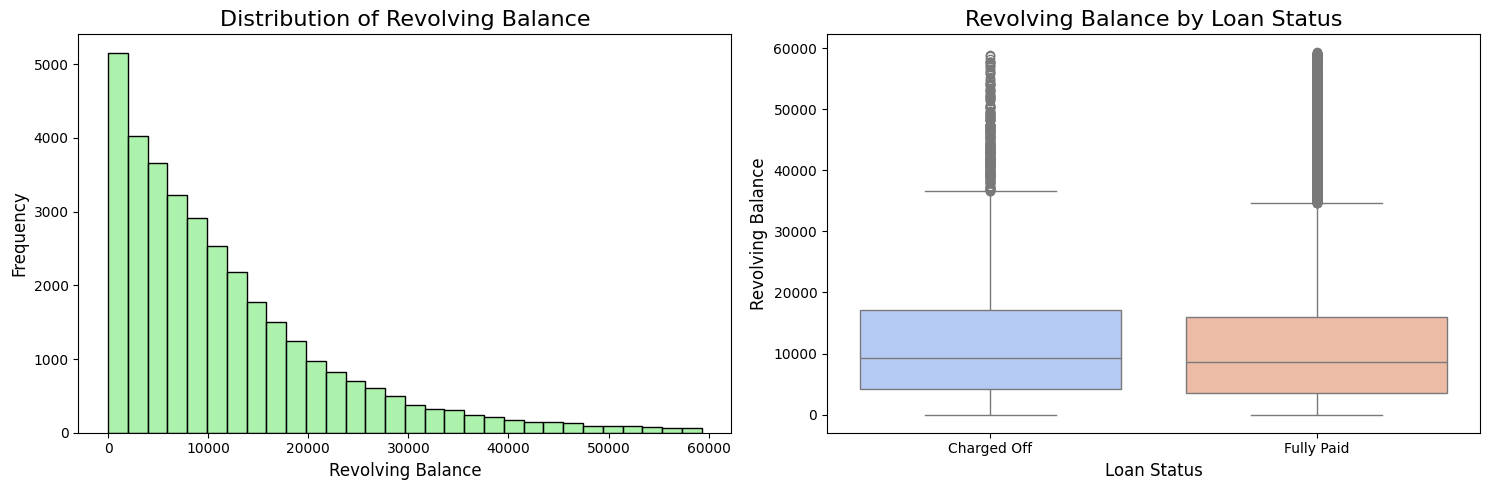

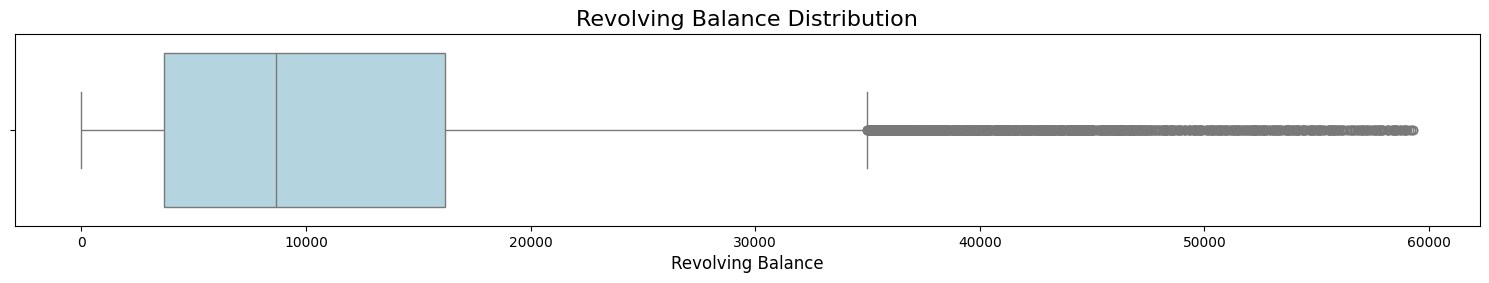

In [138]:
plot_revol_bal_distribution_and_status(final_loan_data)

In [139]:
final_loan_data.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4832.0,12366.055257,11208.406048,0.0,4126.50,9320.0,17137.5,58923.0
Fully Paid,29530.0,11534.806637,10795.440354,0.0,3602.25,8542.5,16039.0,59308.0


#### Observation :

There is no large difference in revolving balance mean for charged off an fully Paid loans


revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [140]:
final_loan_data.revol_util.describe()

count    34362.000000
mean        48.899280
std         28.191175
min          0.000000
25%         25.600000
50%         49.400000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

<Axes: title={'center': 'revol_util'}, xlabel='loan_status'>

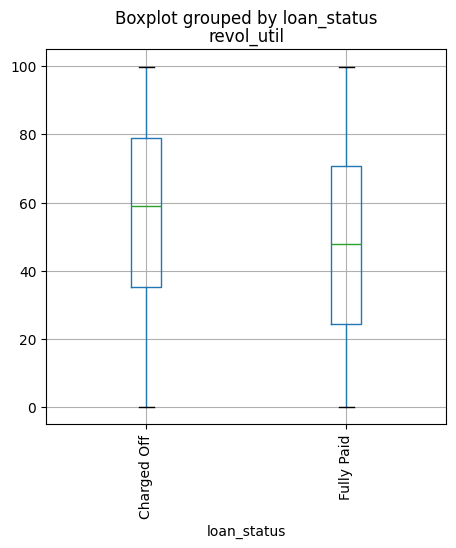

In [141]:
fig, ax = plt.subplots(figsize=(5,5))
final_loan_data.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

#### Observation :

The average utilization rate is around 49%
Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans. This requires more analysis.


In [142]:
final_loan_data['revol_util_bin'] = round(final_loan_data['revol_util']/5)

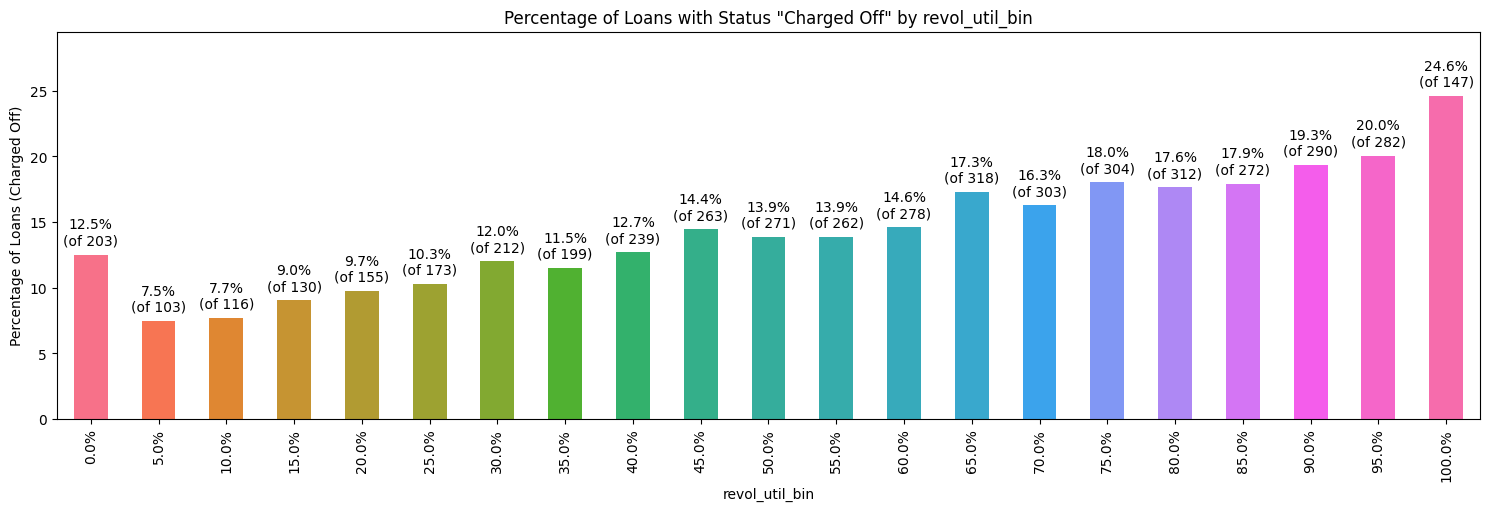

In [143]:
plt.figure(figsize=(15,5))
ax = plot_loan_status_by_percent(final_loan_data, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

total_acc : The total number of credit lines currently in the borrower's credit file.

In [144]:
final_loan_data.total_acc.describe()

count    34362.000000
mean        21.953612
std         11.299985
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<Figure size 1500x500 with 0 Axes>

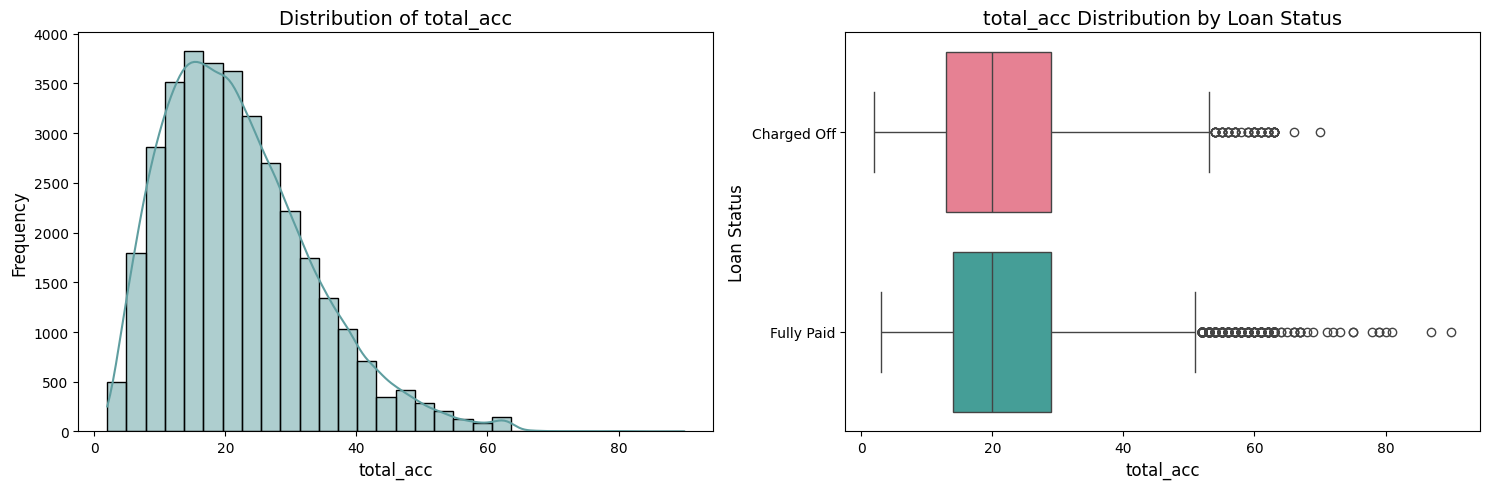

In [145]:
plt.figure(figsize=(15,5))

plot_distribution_on_columns(final_loan_data, 'total_acc')

#### Observation :

The are approx. 22 average credit lines for the borrower's.
There is no big difference between the Charged Off and Fully Paid credit lines

out_prncp : Remaining outstanding principal for total amount funded.

In [146]:
final_loan_data.out_prncp.value_counts()

out_prncp
0.0    34362
Name: count, dtype: int64

In [147]:
final_loan_data.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see the data is 0 and we can drop this column and even for out_prncp_inv

In [148]:
final_loan_data = final_loan_data.drop('out_prncp',axis=1)

In [149]:
final_loan_data = final_loan_data.drop('out_prncp_inv',axis=1)

#### total_pymnt : 
        Lets analyse if the total payment is valid for the analysis.

In [150]:
final_loan_data.total_pymnt.describe()

count    34362.000000
mean     11835.134452
std       8651.878401
min         33.730000
25%       5564.442500
50%       9737.350000
75%      16013.045000
max      58563.680000
Name: total_pymnt, dtype: float64

#### Standard Deviation

In [151]:
final_loan_data = final_loan_data[np.abs(final_loan_data.total_pymnt-final_loan_data.total_pymnt.mean()) <= (3*final_loan_data.total_pymnt.std())]
final_loan_data['total_pymnt'] = final_loan_data['total_pymnt'].apply(lambda x : np.log(x))

<Figure size 1500x500 with 0 Axes>

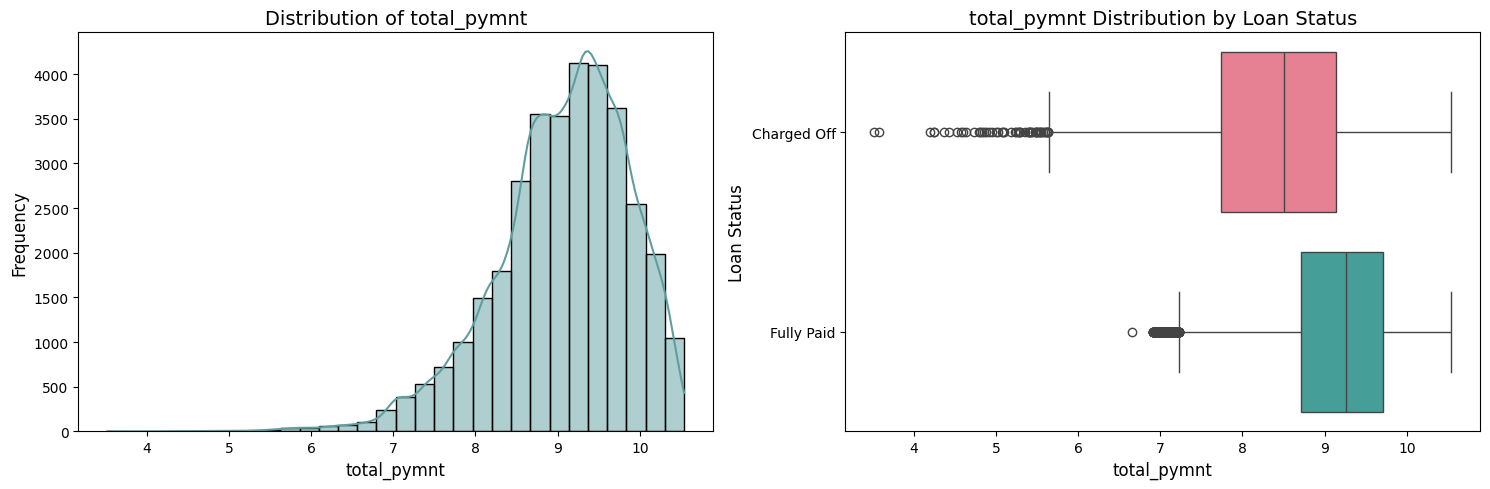

In [152]:
plt.figure(figsize=(15,5))
plot_distribution_on_columns(final_loan_data, 'total_pymnt')
plt.show()

#### Observation :

The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [153]:
final_loan_data = final_loan_data.drop('total_pymnt',axis=1)

last_pymnt_d : Last month payment was received. 


In [154]:
final_loan_data.last_pymnt_d.value_counts().head()

last_pymnt_d
2013-03-01    933
2014-12-01    841
2013-05-01    819
2013-02-01    791
2012-03-01    777
Name: count, dtype: int64

In [155]:
final_loan_data['last_pymnt_d_month']= final_loan_data['last_pymnt_d'].dt.month
final_loan_data['last_pymnt_d_year']= final_loan_data['last_pymnt_d'].dt.year

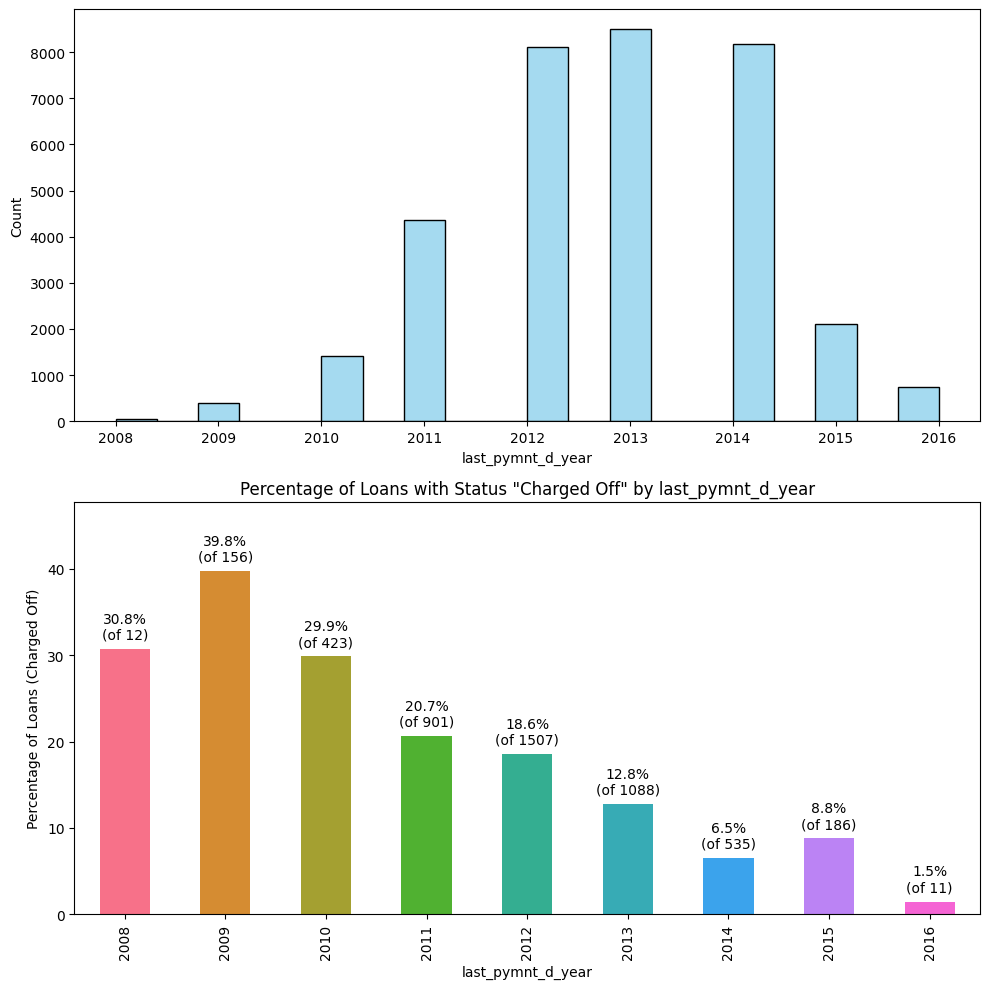

In [156]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

sns.histplot(final_loan_data['last_pymnt_d_year'], kde=False, bins=20, color='skyblue', edgecolor='black')


plt.subplot(2, 1, 2)
plot_loan_status_by_percent(final_loan_data, 'last_pymnt_d_year')
plt.show()

#### Observation :

Overall, around 75% of the last payment dates are during 2012-2014 period.
40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis.
This variable does not affect analysis and will be ignored.

last_pymnt_amnt : Last total payment amount received.

In [157]:
final_loan_data.last_pymnt_amnt.describe()

count    33843.000000
mean      2629.895718
std       4190.238142
min          0.010000
25%        219.765000
50%        567.290000
75%       3412.905000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

The value vary a lot. Lets conver it to log scale and plot to find trend.

In [158]:
final_loan_data['last_pymnt_amnt_log'] = final_loan_data['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

<Figure size 1500x500 with 0 Axes>

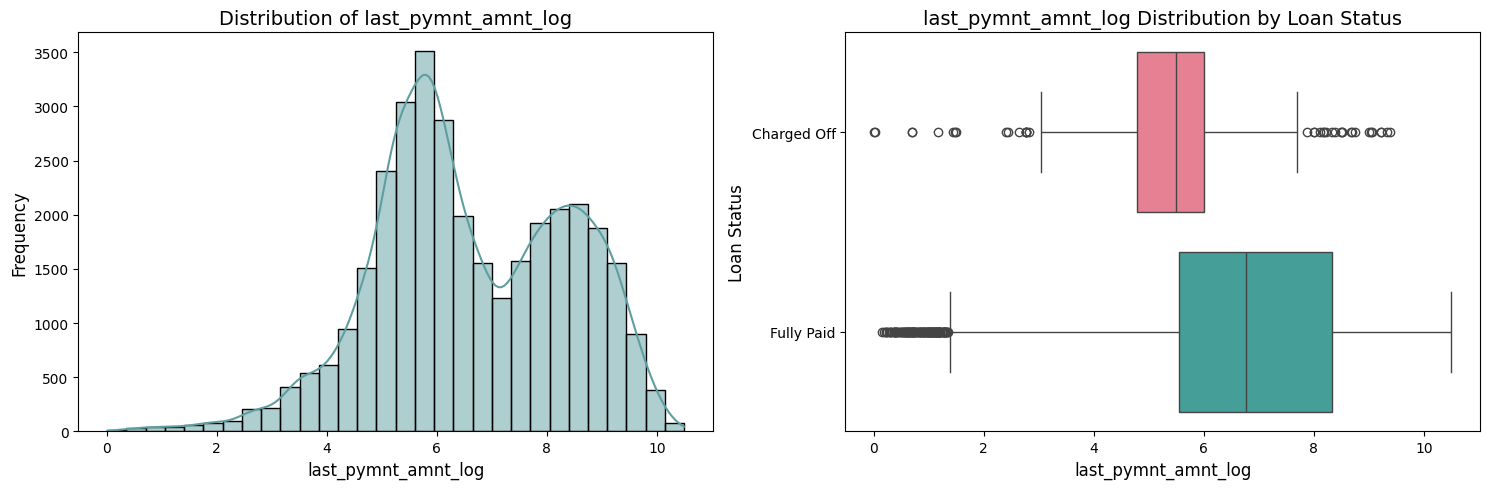

In [159]:
plt.figure(figsize=(15,5))

plot_distribution_on_columns(final_loan_data, 'last_pymnt_amnt_log')
plt.show()

#### Observation :

The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. - This is expected in case of charged of loans


#### Derived variable - ratio of loan amount to annual income

<Axes: xlabel='ratio', ylabel='Count'>

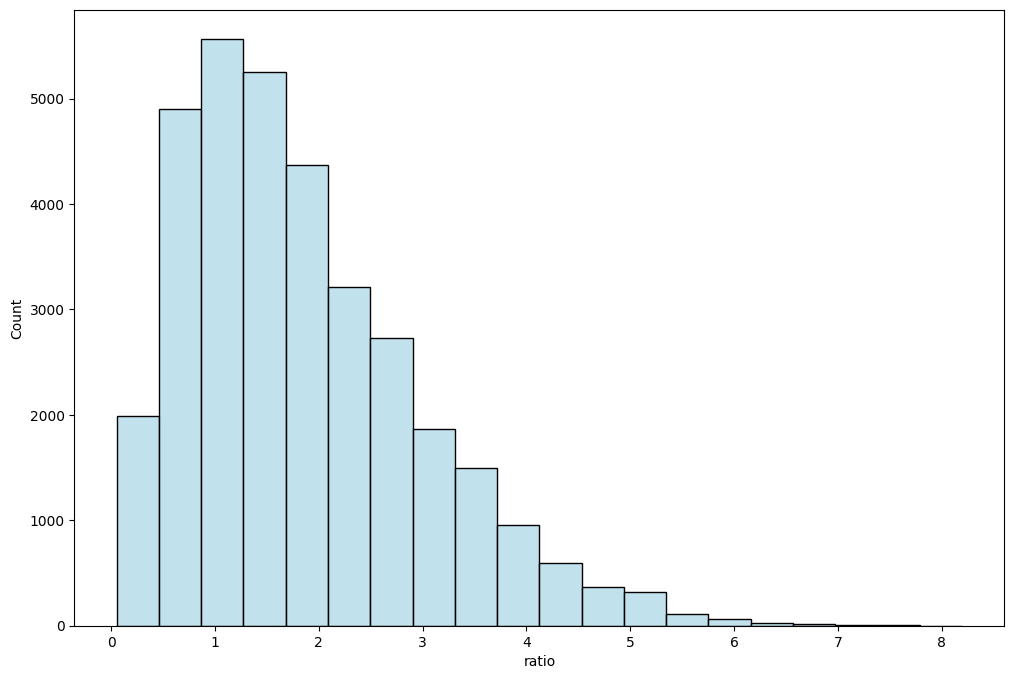

In [160]:
final_loan_data['ratio'] = final_loan_data['loan_amnt'] * 10 / final_loan_data['annual_inc']
sns.histplot(final_loan_data['ratio'], kde=False, bins=20, color='lightblue', edgecolor='black')

<Axes: title={'center': 'Percentage of Loans with Status "Charged Off" by ratio_bin'}, xlabel='ratio_bin', ylabel='Percentage of Loans (Charged Off)'>

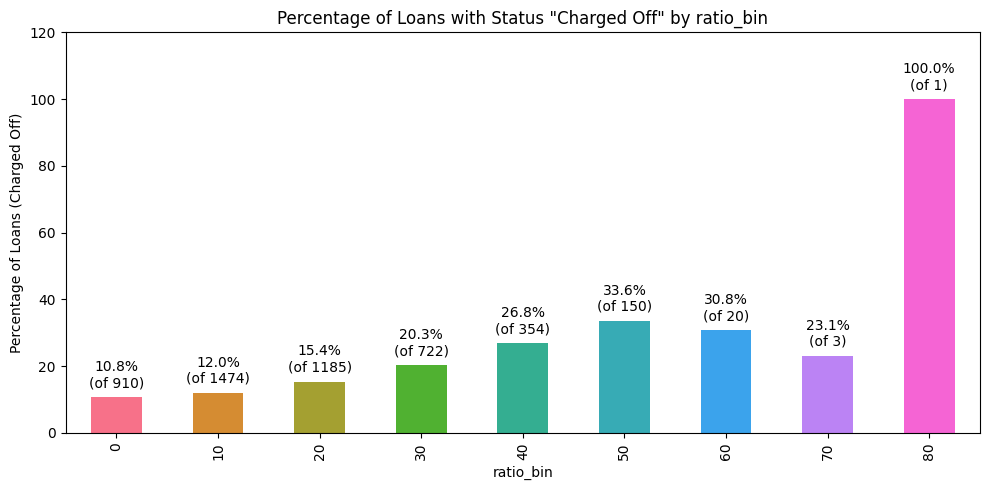

In [161]:
final_loan_data['ratio_bin'] = (final_loan_data['ratio'].astype(int)) * 10
plt.figure(figsize=(10,5))
plot_loan_status_by_percent(final_loan_data, 'ratio_bin')

loan_amnt and annual_inc


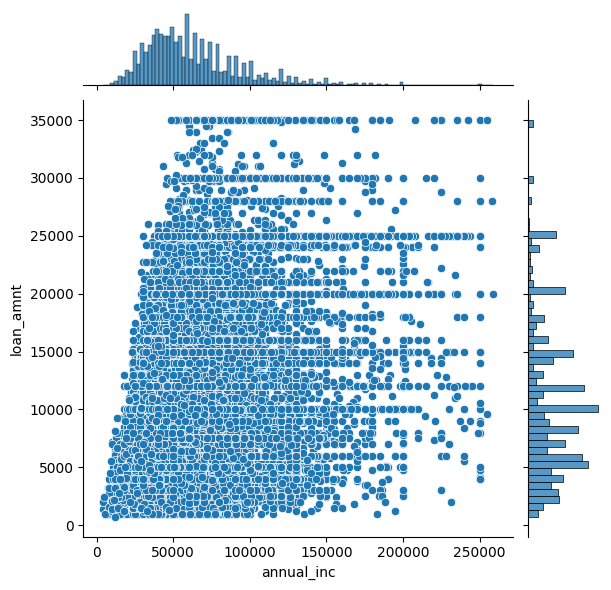

In [162]:
sns.jointplot(x = 'annual_inc', y = 'loan_amnt', data = final_loan_data.loc[final_loan_data['annual_inc']<260000])
plt.show()

#### Observation :

There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans

Analysis on : Interest Rate and Term

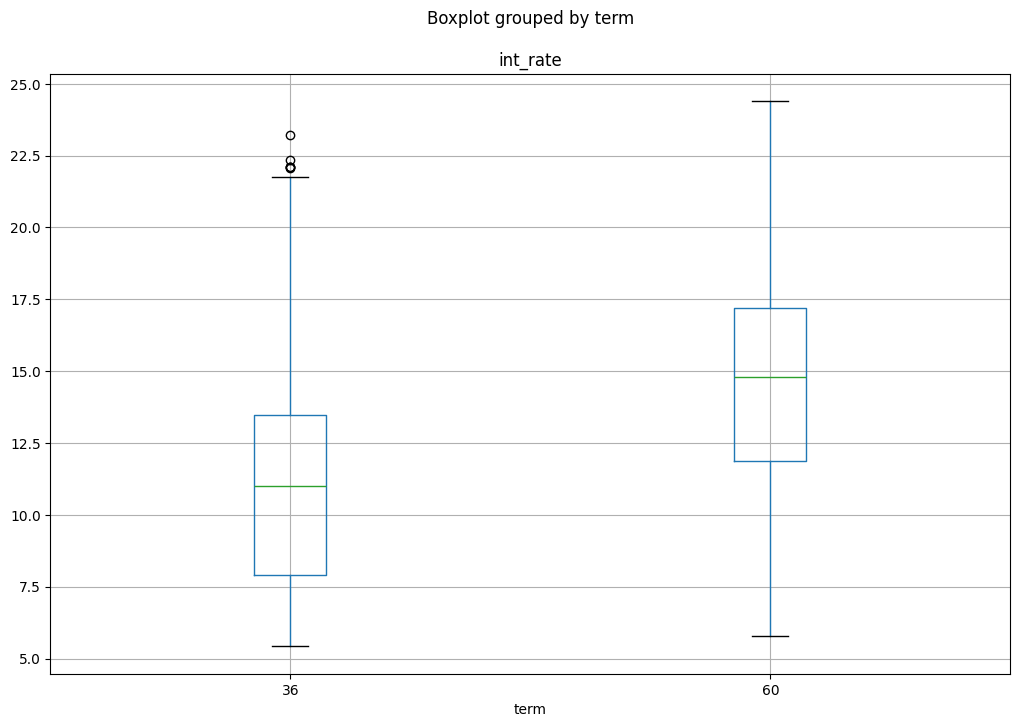

In [163]:
final_loan_data.boxplot(column='int_rate', by='term')
plt.show()

#### Observation :

Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

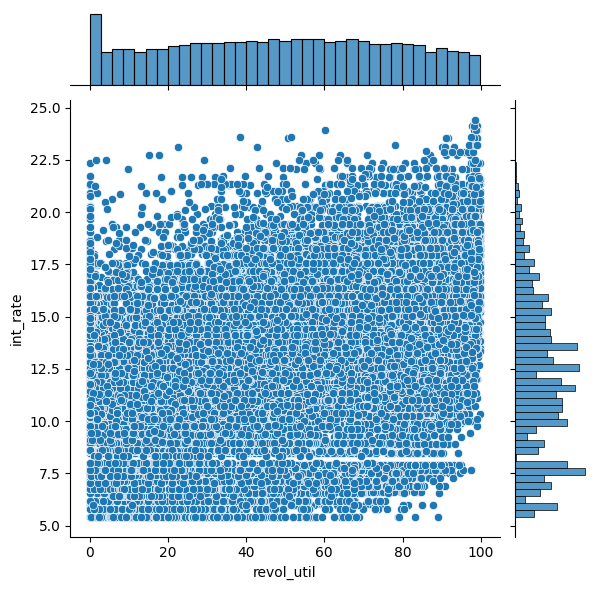

In [164]:
sns.jointplot(x = 'revol_util', y = 'int_rate', data = final_loan_data)


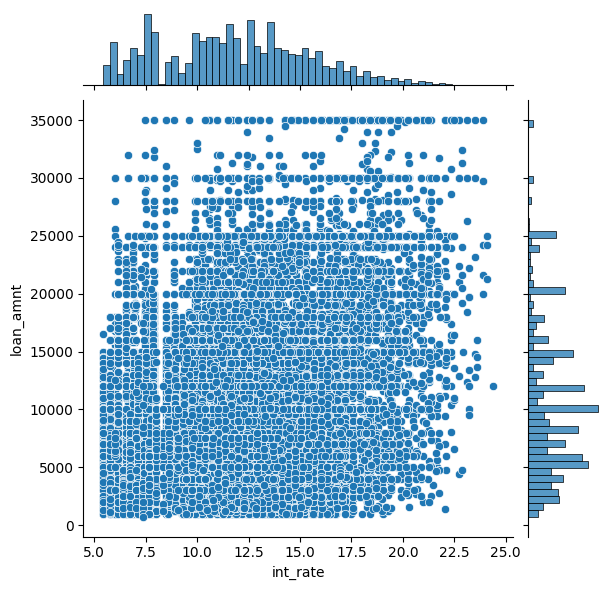

In [165]:
sns.jointplot(x= 'int_rate', y='loan_amnt', data=final_loan_data)

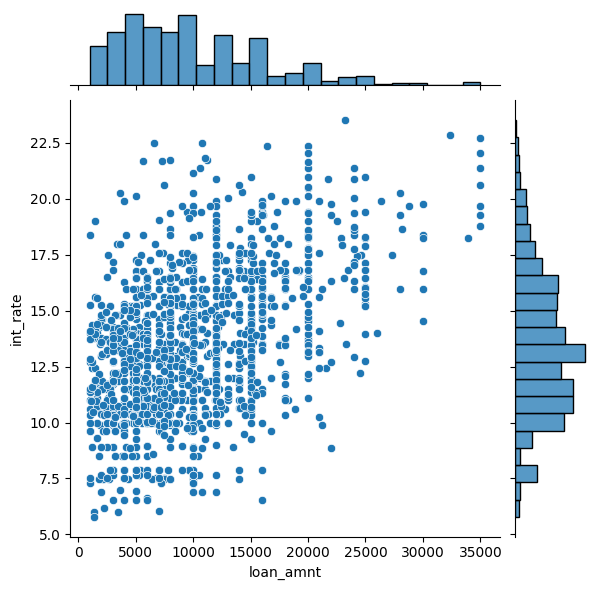

In [166]:
sns.jointplot(x = 'loan_amnt', y = 'int_rate', data = final_loan_data.loc[final_loan_data.pub_rec_bankruptcies > 0])

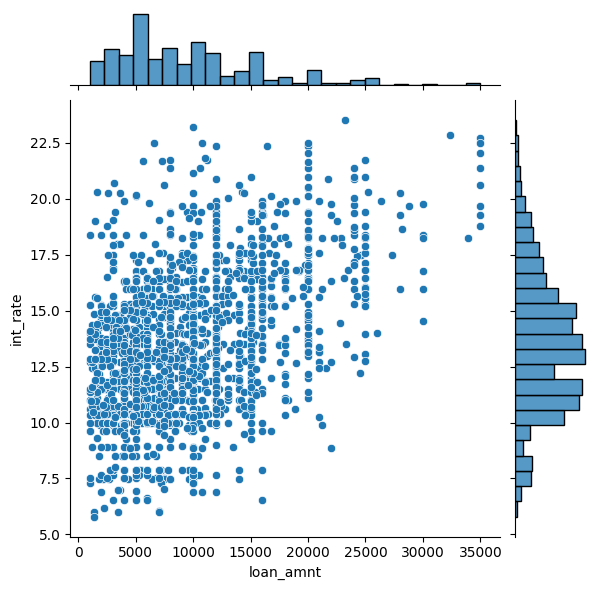

In [167]:
sns.jointplot(x = 'loan_amnt', y = 'int_rate', data = final_loan_data.loc[final_loan_data.pub_rec > 0])

# Multivariate Analysis

loan_amnt vs verification_status vs loan status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

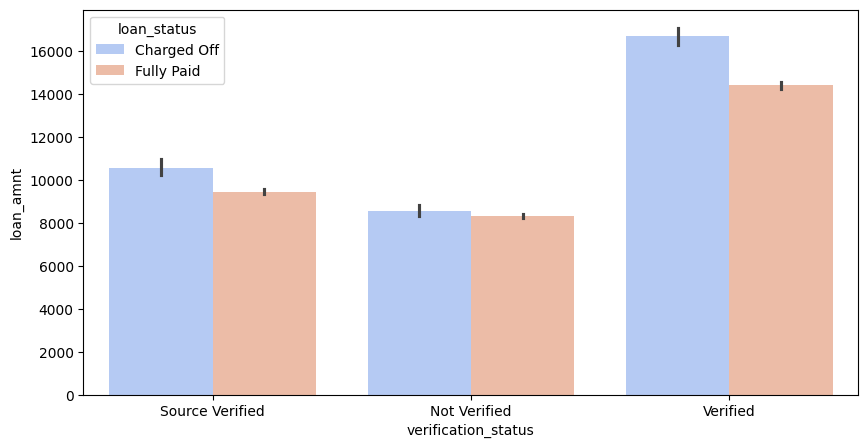

In [168]:
plt.figure(figsize=(10,5))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=final_loan_data, estimator=np.mean, palette = 'coolwarm')

#### Observation :

Higher loan amounts are Verified more often.
And others have lesser verification status.

delinq_2yr VS loan amount VS grade

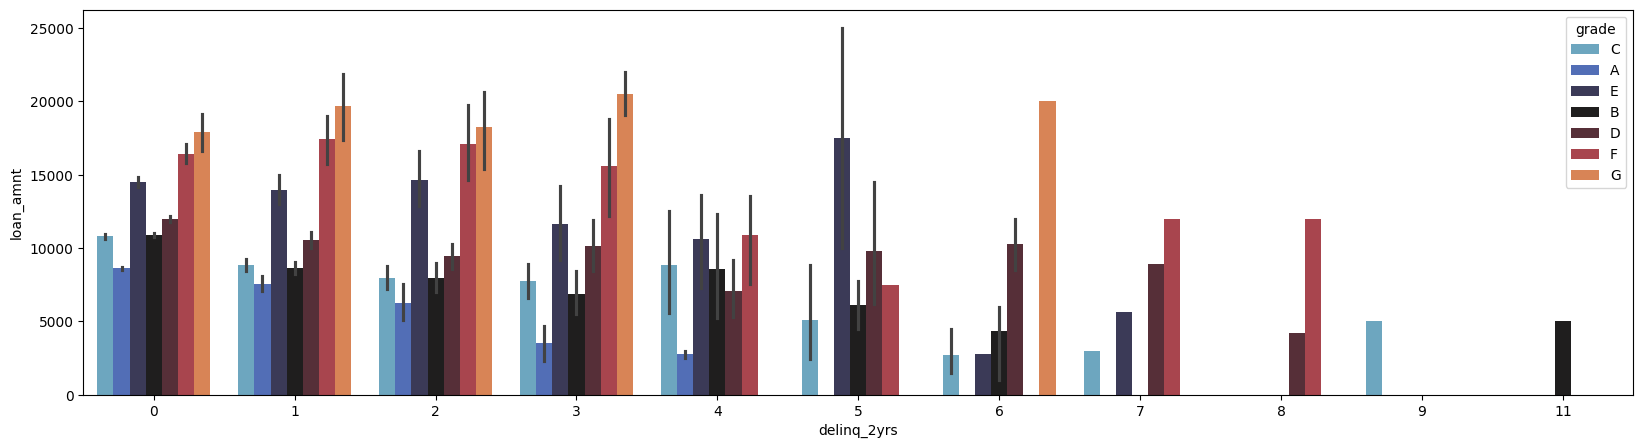

In [169]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=final_loan_data, estimator=np.mean, palette = 'icefire')
plt.show()

#### Observation :

Not many loans receive investment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.

Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.


delinq_2yr VS int_rate VS loan_status

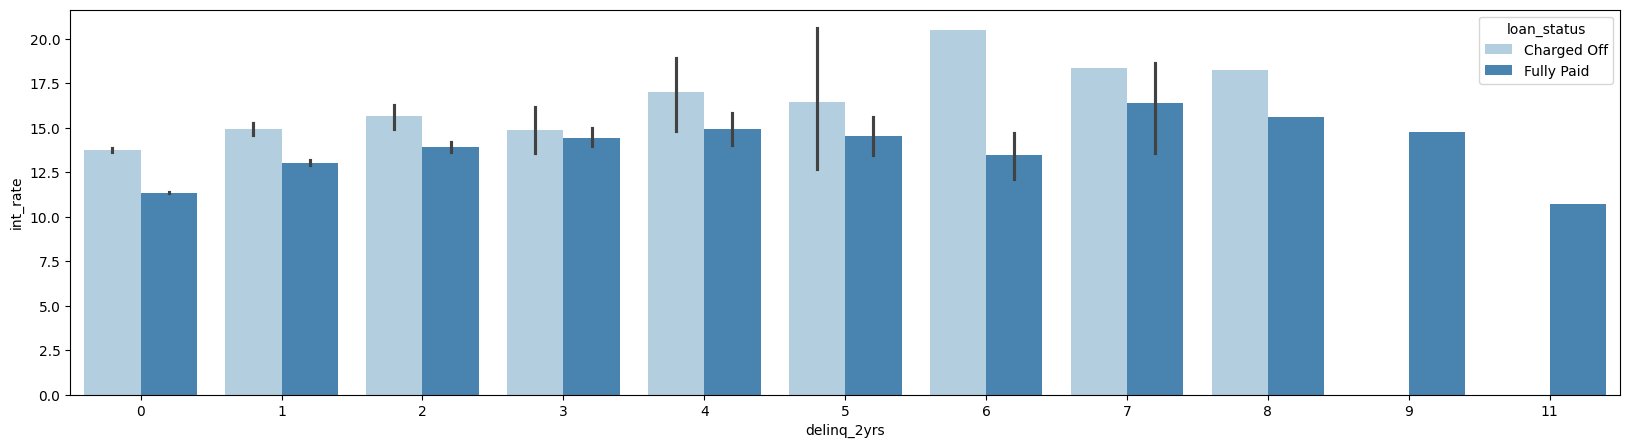

In [170]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=final_loan_data, estimator=np.mean, palette = 'Blues')
plt.show()

# Correlation

In [171]:
corr=final_loan_data.corr(numeric_only=True)
corr['loan_amnt']

loan_amnt                  1.000000
funded_amnt                0.979057
funded_amnt_inv            0.946829
int_rate                   0.265635
installment                0.924673
emp_length                 0.138875
annual_inc                 0.377837
dti                        0.068000
delinq_2yrs               -0.042185
inq_last_6mths             0.008383
open_acc                   0.164531
pub_rec                   -0.039052
revol_bal                  0.349603
revol_util                 0.062968
total_acc                  0.241038
total_pymnt_inv            0.837226
total_rec_prncp            0.819290
total_rec_int              0.704452
total_rec_late_fee         0.041983
recoveries                 0.157508
collection_recovery_fee    0.083361
last_pymnt_amnt            0.439997
pub_rec_bankruptcies      -0.022041
issue_d_month              0.049868
issue_d_year               0.088081
income_bin                 0.373390
interest_rate_buckets      0.265842
revol_bal_log              0

#### Observation : 
        We can see above that there are few correlations which are positive and we can consider those to plot a heat map

<Axes: >

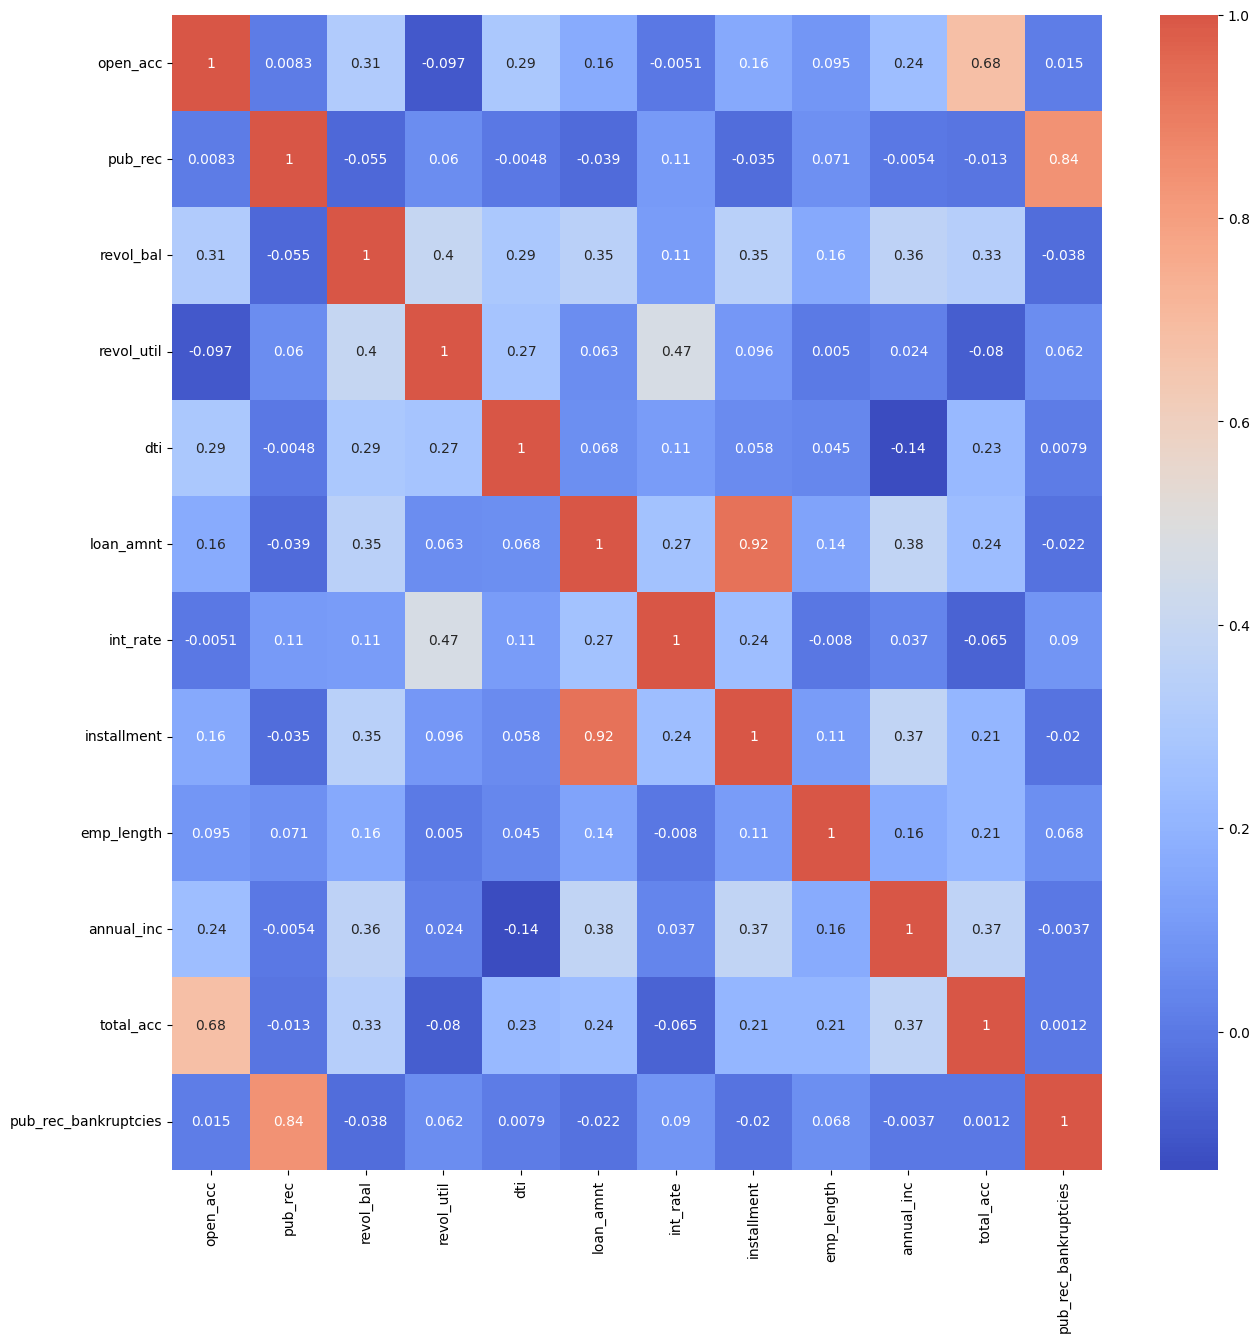

In [172]:
plt.figure(figsize=(15,15))
cont_var= ['open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'dti',
       'loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
        'total_acc',
       'pub_rec_bankruptcies']
corr = final_loan_data[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5, cmap='coolwarm')

#### Observation :
    Strong Positive Correlations : 
        open_acc - total_acc -> 0.68
        pub_rec - pub_rec_bankruptcies -> 0.84
        revol_util - int_rate -> 0.47
        loan_amnt - installment -> 0.92

    Weak Correlations : 
        total_acc - pub_rec_bankruptcies -> 0.0012
        emp_length - revol_util -> 0.005
        
    
    Negative Correlations :
        dti - annual_inc -> -0.14
        open_acc - revol_util -> -0.097
        pub_rec - loan_amnt -> -0.039
    